**PROGRAMMING FOR DATA SCIENCE: Final Project** 

**Name:** Letizia 

**Surname:** Lanza 

**ID:** VR502321

**PART 1: Data Exploration and Data Wrangling**

**1. Explore the dataset:**  your first task is to explore the data as seen in class, finding correlations between attributes and finding some interesting aspects that justify the next parts of the analysis. 

The chosen dataset is available at the following Kaggle's link: https://www.kaggle.com/datasets/sogun3/uspollution.  
The dataset is about pollution in the U.S. that has been well documented by the U.S. EPA. 
In particular, this dataset deal with the four major pollutants, which are Nitrogen Dioxide (NO2), Sulphur Dioxide (SO2), Carbon Monoxide (CO) and Ozone (O3), for every day between 2000 and 2016.

The first thing to succesfully carry out this and the following exercises, is to import some libraries as we have seen in class such as: 

In [113]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

The aim of the following command is being able to read data from a CSV file and load it into a Pandas DataFrame.

In [114]:
pollution_df = pd.read_csv('pollution_us_2000_2016.csv')
pollution_df

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.200,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.200,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.200,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.200,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,24599,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,...,Parts per billion,0.000000,0.0,2,NaN,Parts per million,0.091667,0.100,2,1.0
1746657,24600,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.067714,0.127,0,NaN
1746658,24601,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.100000,0.100,0,1.0
1746659,24602,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,0.000000,0.0,5,NaN,Parts per million,0.067714,0.127,0,NaN


As it can be seen the dataset has 1746661 rows and 29 columns. 

The following *DataFrame.drop()* function is used to remove rows or columns that are not useful in the DataFrame. 

In [115]:
pollution_df = pollution_df.drop(['Unnamed: 0','State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units'], axis = 1)
pollution_df

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.200,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.200,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.200,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.200,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.000000,0.0,2,NaN,0.091667,0.100,2,1.0
1746657,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.067714,0.127,0,NaN
1746658,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.100000,0.100,0,1.0
1746659,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,0.000000,0.0,5,NaN,0.067714,0.127,0,NaN


The number of columns decreased from 29 to 20 as it is required to delete Unnamed: 0 column, State Code column, County Code column, Site Num column, Address column, NO2 Units column, O3 Units column, SO2 Units column and CO Units column, while the number of rows remained the same. 

The *DataFrame.info()* function prints information about the DataFrame such as number of columns, column labels, column data types, memory usage, range index and the number of cells in each column (non-null values): 

In [116]:
pollution_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   State              1746661 non-null  object 
 1   County             1746661 non-null  object 
 2   City               1746661 non-null  object 
 3   Date Local         1746661 non-null  object 
 4   NO2 Mean           1746661 non-null  float64
 5   NO2 1st Max Value  1746661 non-null  float64
 6   NO2 1st Max Hour   1746661 non-null  int64  
 7   NO2 AQI            1746661 non-null  int64  
 8   O3 Mean            1746661 non-null  float64
 9   O3 1st Max Value   1746661 non-null  float64
 10  O3 1st Max Hour    1746661 non-null  int64  
 11  O3 AQI             1746661 non-null  int64  
 12  SO2 Mean           1746661 non-null  float64
 13  SO2 1st Max Value  1746661 non-null  float64
 14  SO2 1st Max Hour   1746661 non-null  int64  
 15  SO2 AQI            873754 non-nu

In particular, in this case it was necessary to add the *verbose = True* and the *show_counts = True* functions to get a broader and more detailed overview of the dataset. 
Moreover, the *verbose = True* function stands for controlling the verbosity of the output and when it is set to 'True', it provides some additional information like column names and data types. The *show_count = True* function, also, shows the number of non-null values for each column alongside the total row count. 

Hence, as it can be seen there are 20 column with a RangeIndex (rows) for a total of 1746661. Moreover, the Non-Null Count column returns the number of non-null values in the relative column of the DataFrame, as said before.
There are also 3 types of data type such as object (generic data), float (real numbers that can have a fractional part) and int (real whole numbers without a fractional part).
Another information that can be read is the memory usage of 266.5+ MB. 

The *DataFrame.describe()* function gives descriptive information about the dataset as it can be seen below: 

In [117]:
pollution_df.describe()

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


Glossary: 
- count: the number of non-null values in each column 
- mean: the mean (average) value of each numerical column 
- sdt: the standard deviation of each numerical column 
- min: the minimum value in each numerical column 
- 25%: the value at the 25th percentile (first quartile) of each numerical column 
- 50%: the value at the 50th percentile (median or second quartile) of each numerical column 
- 75%: the value at the 75th percentile (third quartile) of each numerical column
- max: the maximum value in each numerical column 

The *DataFrame.describe().T* function is used to transpose index and columns of the data frame as follow: 

In [118]:
pollution_df.describe().T

,count,mean,std,min,25%,50%,75%,max
NO2 Mean,1746661.0,12.821930,9.504814,-2.0000,5.750000,10.739130,17.713636,139.541667
NO2 1st Max Value,1746661.0,25.414848,15.999630,-2.0000,13.000000,24.000000,35.700000,267.000000
NO2 1st Max Hour,1746661.0,11.731023,7.877501,0.0000,5.000000,9.000000,20.000000,23.000000
NO2 AQI,1746661.0,23.898217,15.162805,0.0000,12.000000,23.000000,33.000000,132.000000
O3 Mean,1746661.0,0.026125,0.011370,0.0000,0.017875,0.025875,0.033917,0.095083
O3 1st Max Value,1746661.0,0.039203,0.015344,0.0000,0.029000,0.038000,0.048000,0.141000
O3 1st Max Hour,1746661.0,10.170529,4.003144,0.0000,9.000000,10.000000,11.000000,23.000000
O3 AQI,1746661.0,36.050121,19.780423,0.0000,25.000000,33.000000,42.000000,218.000000
SO2 Mean,1746661.0,1.870364,2.760435,-2.0000,0.256522,0.987500,2.325000,321.625000
SO2 1st Max Value,1746661.0,4.492185,7.679866,-2.0000,0.800000,2.000000,5.000000,351.000000


The *DataFrame.head()* function displays the first 5 rows of the DataFrame by default as below: 

In [119]:
pollution_df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


The *DataFrame.tail()* function returns the last 5 rows of the dataframe by default as can be seen: 

In [120]:
pollution_df.tail()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
1746656,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.000000,0.0,2,NaN,0.091667,0.100,2,1.0
1746657,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.067714,0.127,0,NaN
1746658,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.100000,0.100,0,1.0
1746659,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,0.000000,0.0,5,NaN,0.067714,0.127,0,NaN
1746660,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,0.000000,0.0,5,NaN,0.100000,0.100,0,1.0


The *DataFrame.columns* function is an attribute that provides access to the column labels of a DataFrame: 

In [121]:
pollution_df.columns

Index(['State', 'County', 'City', 'Date Local', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

The *DataFrame.max()* function is used to find the maximum value in the DataFrame: 

In [122]:
pollution_df.max()

State                   Wyoming
County                     York
City                       York
Date Local           2016-05-31
NO2 Mean             139.541667
NO2 1st Max Value         267.0
NO2 1st Max Hour             23
NO2 AQI                     132
O3 Mean                0.095083
O3 1st Max Value          0.141
O3 1st Max Hour              23
O3 AQI                      218
SO2 Mean                321.625
SO2 1st Max Value         351.0
SO2 1st Max Hour             23
SO2 AQI                   200.0
CO Mean                7.508333
CO 1st Max Value           19.9
CO 1st Max Hour              23
CO AQI                    201.0
dtype: object

The *DataFrame.min()* function is used to find the minimum value in the DataFrame: 

In [123]:
pollution_df.min()

State                    Alabama
County                       Ada
City                 Albuquerque
Date Local            2000-01-01
NO2 Mean                    -2.0
NO2 1st Max Value           -2.0
NO2 1st Max Hour               0
NO2 AQI                        0
O3 Mean                      0.0
O3 1st Max Value             0.0
O3 1st Max Hour                0
O3 AQI                         0
SO2 Mean                    -2.0
SO2 1st Max Value           -2.0
SO2 1st Max Hour               0
SO2 AQI                      0.0
CO Mean                  -0.4375
CO 1st Max Value            -0.4
CO 1st Max Hour                0
CO AQI                       0.0
dtype: object

**2. Clean up the dataset:** this step encompasses the replacement of null values with appropriate data or their outright removal. During this step you are encouraged to modify the data according to the consideration matured during the exploration.

For checking if there are some null values the *DataFrame.isnull()* function can be used: 

In [124]:
pollution_df.isnull()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1746657,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1746658,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1746659,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True


As it can be seen, some columns present the 'True' word that highlight a null value in that position.

Another way to identify how many null values there are in the dataframe is: 

In [125]:
pollution_df.isnull().sum()

State                     0
County                    0
City                      0
Date Local                0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

Let's make a copy of the dataset in order to use 'the original version' twice to show how to handle with null values.

In [126]:
copy_of_pollution_df = pollution_df.copy()

To understand the completeness of the dataset, it is useful identifying the percentage of null values in those columns that have shown to exhibit such missing values:

In [127]:
print('The percentage of SO2 AQI null values is:', pollution_df['SO2 AQI'].isna().sum()/len(pollution_df) * 100)

print('The percentage of CO AQI null values is:', pollution_df['CO AQI'].isna().sum()/len(pollution_df) * 100)

The percentage of SO2 AQI null values is: 49.975753738132354
The percentage of CO AQI null values is: 49.99957060929396


As it can be seen, the percentage of null values is quite high. 

So, with the following code it can be seen that first it is calculated the mean of a specific column and then every missing values in that column is replaced with the mean value of the referring column. 

In [128]:
SO2_AQI = pollution_df['SO2 AQI'].mean()
pollution_df['SO2 AQI'] = pollution_df['SO2 AQI'].fillna(SO2_AQI)
SO2_AQI

7.115944533587257

Moreover, with the following code it can be seen that first it is calculated the mode of a specific column and then every missing values in that column is replaced with the mode value of the referring column. 

In [129]:
CO_AQI = pollution_df['CO AQI'].mode()
pollution_df['CO AQI']= pollution_df['CO AQI'].fillna(CO_AQI)
CO_AQI

0    3.0
Name: CO AQI, dtype: float64

Another way to deal with null values can be deleting the columns with that kind of values using the following functions: 

In [130]:
copy_of_pollution_df

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.200,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.200,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.200,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.200,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.000000,0.0,2,NaN,0.091667,0.100,2,1.0
1746657,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.067714,0.127,0,NaN
1746658,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.100000,0.100,0,1.0
1746659,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,0.000000,0.0,5,NaN,0.067714,0.127,0,NaN


In [131]:
copy_of_pollution_df.isnull()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1746657,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1746658,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1746659,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True


In [132]:
copy_of_pollution_df.isnull().sum()

State                     0
County                    0
City                      0
Date Local                0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [133]:
copy_of_pollution_df = pollution_df.dropna()
copy_of_pollution_df

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.000000,1.145833,4.2,21,3.0
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.000000,0.878947,2.2,23,25.0
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,7.115945,0.878947,2.2,23,25.0
5,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.000000,1.066667,2.3,0,26.0
7,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.937500,2.6,23,7.115945,1.066667,2.3,0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746652,Wyoming,Laramie,Not in a city,2016-03-29,2.564706,3.6,6,3,0.028000,0.040,23,37,0.120000,0.4,8,7.115945,0.006667,0.1,0,1.0
1746654,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.016667,0.1,0,0.000000,0.091667,0.1,2,1.0
1746656,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.000000,0.0,2,7.115945,0.091667,0.1,2,1.0
1746658,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.000000,0.100000,0.1,0,1.0


In this case, having delete the SO2 AQI column and the CO AQI column, which have lots of null values, do not alterate the structure of the dataset in any way. In fact the Air Quality Index is a marginal column in this analysis and the percentage of null values in those columns is quite high so they are somewhat useless.

After having done some structural changes, the dimensions of the DataFrame can be checked as follows: 

In [134]:
copy_of_pollution_df.shape

(873339, 20)

Now it is valuable to check if all the null values are deleted correctly, using again the same code as above:

In [135]:
copy_of_pollution_df.isnull().sum()

State                0
County               0
City                 0
Date Local           0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64

The code worked correclty. 

**3. Show some interesting plots:** an essential skill of a data scientist is being able to show the important information by using easily understandable graphs. Use the libraries introduced in class to show case some interesting aspects of the dataset. 
An additional 2 points can be awarded for code cleanliness.

In this case, it is important to recall the previous libraries that we imported at the beginning, such as: 

In [136]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 

Since the chosen dataset has lots of data, to show some interesting plots it is better to select just some of the features. For example, the code below only takes into account values that refer to the city of Phoenix. 

In [137]:
pollution_phoenix = pollution_df[pollution_df['City'] == 'Phoenix']
pollution_phoenix

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.000000,1.145833,4.200,21,3.0
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.000000,0.878947,2.200,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,7.115945,1.145833,4.200,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,7.115945,0.878947,2.200,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.000000,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722964,Arizona,Maricopa,Phoenix,2016-03-25,17.308333,40.2,22,38,0.027125,0.051,11,47,0.425000,0.8,23,7.115945,0.470833,0.800,1,9.0
1722965,Arizona,Maricopa,Phoenix,2016-03-26,14.579167,35.2,0,33,0.042053,0.060,11,67,0.637500,1.2,0,1.000000,0.433000,0.892,1,NaN
1722966,Arizona,Maricopa,Phoenix,2016-03-26,14.579167,35.2,0,33,0.042053,0.060,11,67,0.637500,1.2,0,1.000000,0.454167,0.800,3,9.0
1722967,Arizona,Maricopa,Phoenix,2016-03-26,14.579167,35.2,0,33,0.042053,0.060,11,67,0.600000,1.1,2,7.115945,0.433000,0.892,1,NaN


As it can be seen, there is still a lot of data, in fact there are 37912 rows and 20 columns.

If, for example, it is tried to make a very primitive plot with all the data in the NO2 Mean column, what comes out is: 

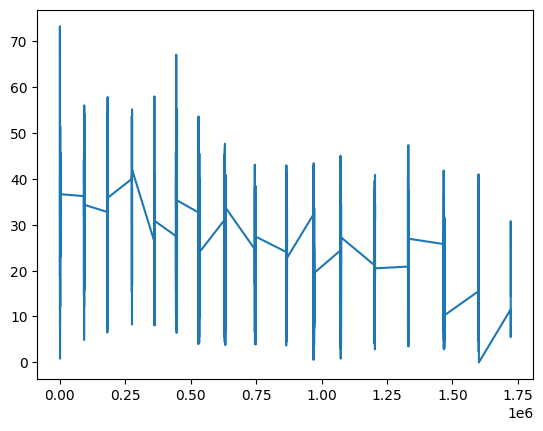

In [138]:
plt.figure
plt.plot(pollution_phoenix['NO2 Mean'], label = '')
plt.show()

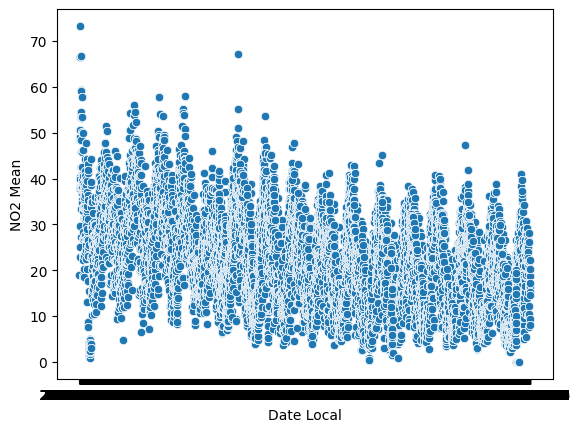

In [139]:
plt.figure()
sns.scatterplot(data = pollution_phoenix, x = 'Date Local', y = 'NO2 Mean')
plt.show()

Looking at the graphs, it is very difficult to understand what they want to communicate due to the fact that there is still too much data. In fact, here the phrase "too much data provides no data" clearly finds meaning. 

An interesting thing that can be done is to filter the data from Phoenix for the year 2001 and understang if all of the 365 days of 2001 have been measured.  

Dealing with the following code it can be said that the first line converts the *'Date Local'* column of the *pollution_phoenix* DataFrame into a *'datetime'* object and this operation is useful when working with time data as it allows for specific date operations. The second and the third line create 2 *'datetime'* objects representing the start date and the end date of the year 2001. The fourth line filters the *pollution_phoenix* DataFrame keeping only the rows where the *'Date Local'* is between the start and the end date of 2001. The fifth line calculates whether there is at least one measurement for each day of 2001 and it does this by checking if the number of unique dates in the filtered DataFrame *pollution_phoenix* is equal to the total number of days in 2001, moreover, the *'+1'* is added to account for both start and end date. The sixth and the following 3 lines refer to the fifth line by printing *'All days in 2001 have at least one measurement'* if the equation in line 5 has an output in 'True', while printing *'NOT all days in 2001 have measurement'* if the output is 'False'. At the end is asked to print out how many days were actually measured. 

In [140]:
pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])
start_date = pd.to_datetime('2001-01-01')
end_date = pd.to_datetime('2001-12-31')
pollution_phoenix = pollution_phoenix[(pollution_phoenix['Date Local'] >= start_date) & (pollution_phoenix['Date Local'] <= end_date)]
all_day_measure = len(pollution_phoenix['Date Local'].dt.date.unique()) == (end_date - start_date).days + 1
if all_day_measure:
    print('All days in 2001 have at least one measurement')
else: 
    print('NOT all days in 2001 have measurement')
    
print(len(pollution_phoenix['Date Local'].dt.date.unique()))

NOT all days in 2001 have measurement
359


/var/folders/nt/j3zdw65j5ys5rx0l1vhss5y40000gn/T/ipykernel_1584/3625303002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])


The output of the code is negative, so not every day has been measured in 2001 and in fact 359 days out of 365 were measured.

So let's check how many measurement are there for the NO2 Mean column in 2001. The first 4 lines are the same as above so what's new is just the the fifth line, which groups the data based on the *'Date Local'* considering only the date part without the time *'.dt.date'* and then takes the first value *'.first()'* of the NO2 Mean column for each day in 2001 (since there are about 4 measurement for every day).  

In [141]:
pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])
start_date = pd.to_datetime('2001-01-01')
end_date = pd.to_datetime('2001-12-31')
pollution_phoenix = pollution_phoenix[(pollution_phoenix['Date Local'] >= start_date) & (pollution_phoenix['Date Local'] <= end_date)]
pollution_phoenix_NO2 = pollution_phoenix.groupby(pollution_phoenix['Date Local'].dt.date)['NO2 Mean'].first()
pollution_phoenix_NO2

/var/folders/nt/j3zdw65j5ys5rx0l1vhss5y40000gn/T/ipykernel_1584/3155308113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])


Date Local
2001-01-01    36.250000
2001-01-02    36.173913
2001-01-03    36.083333
2001-01-04    43.041667
2001-01-05    42.500000
                ...    
2001-12-27    42.916667
2001-12-28    46.652174
2001-12-29    38.875000
2001-12-30    38.875000
2001-12-31    34.363636
Name: NO2 Mean, Length: 359, dtype: float64

Since it was checked that NOT all days in 2001 have measurement, it wasn't expected to have 365 measurement and in fact the 359 measurement match what was checked previously.

Now, if it is tried again to make a very primitive plot with only the first measurement of the available days in 2001, what comes out is: 

359


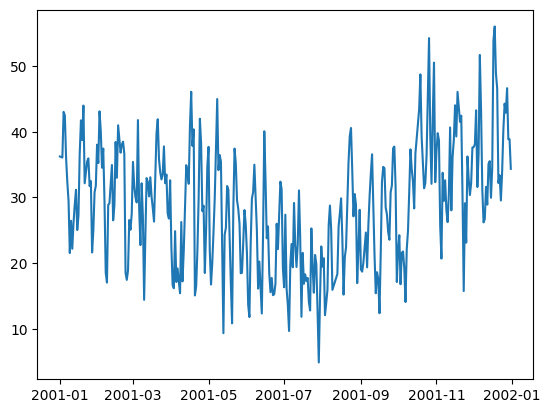

In [142]:
print(len(pollution_phoenix_NO2))
plt.figure
plt.plot(pollution_phoenix_NO2, label = '')
plt.show()

This is the trend of the NO2 pollutant for the year 2001 in the city of Phoenix. It is certainly much more explanatory than the previous one and in fact it can be seen that the last 3 months of the year had the highest levels of NO2 pollution. In fact, the presence of high Nitrogen Dioxide concentrations in Winter can be attributed to several factors such as fossil fuel combustion (home heating), atmospheric stability and vehicles emissions. 

The same arguments made above will now be made for the O3 pollutant.

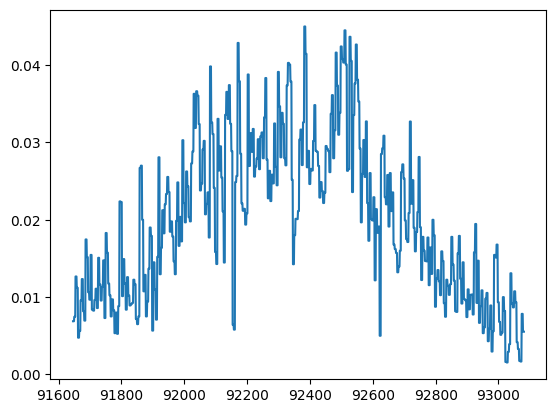

In [143]:
plt.figure
plt.plot(pollution_phoenix['O3 Mean'], label = '')
plt.show()

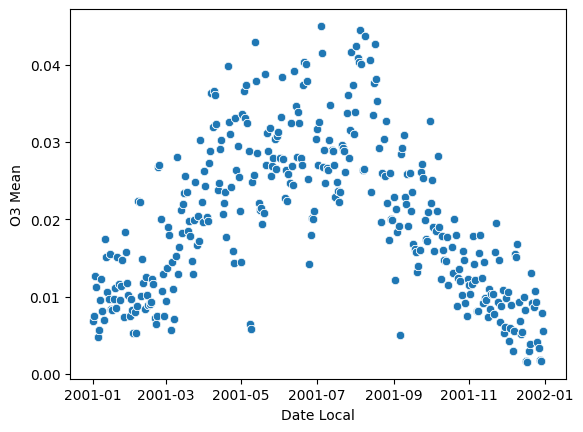

In [144]:
plt.figure()
sns.scatterplot(data = pollution_phoenix, x = 'Date Local', y = 'O3 Mean')
plt.show()

In [145]:
pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])
start_date = pd.to_datetime('2001-01-01')
end_date = pd.to_datetime('2001-12-31')
pollution_phoenix = pollution_phoenix[(pollution_phoenix['Date Local'] >= start_date) & (pollution_phoenix['Date Local'] <= end_date)]
pollution_phoenix_O3 = pollution_phoenix.groupby(pollution_phoenix['Date Local'].dt.date)['O3 Mean'].first()
pollution_phoenix_O3

Date Local
2001-01-01    0.006875
2001-01-02    0.007458
2001-01-03    0.012667
2001-01-04    0.011208
2001-01-05    0.004750
                ...   
2001-12-27    0.003292
2001-12-28    0.001750
2001-12-29    0.001667
2001-12-30    0.007833
2001-12-31    0.005526
Name: O3 Mean, Length: 359, dtype: float64

359


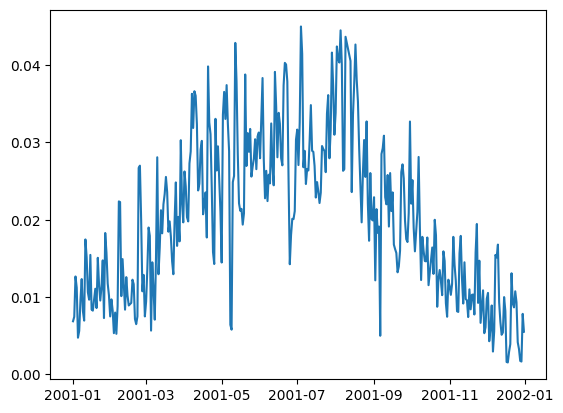

In [146]:
print(len(pollution_phoenix_O3))
plt.figure
plt.plot(pollution_phoenix_O3, label = '')
plt.show()

As might be expected, for the O3 pollutant, the highest pollution levels are in the middle months of the year that coincide with the Summer months. In fact, some factors that contribute to the accumulation of Ozone in the air are, for example, intense sunlight, high temperatures and atmospheric stability. 

Now, the same arguments made above will now be made for the SO2 pollutant.

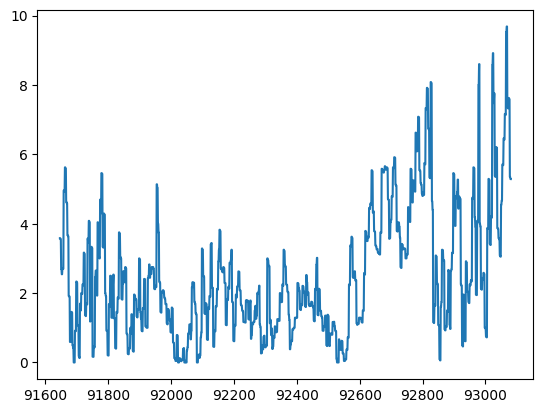

In [147]:
plt.figure
plt.plot(pollution_phoenix['SO2 Mean'], label = '')
plt.show()

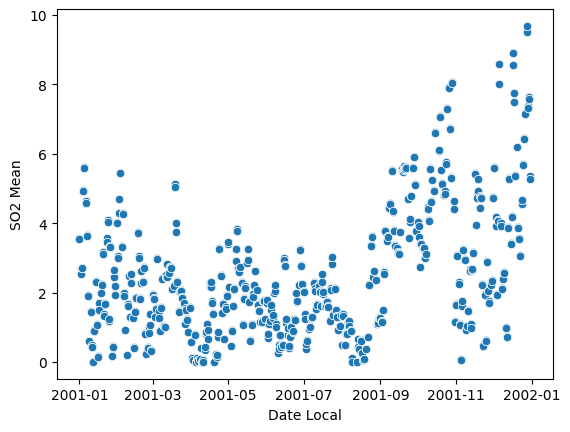

In [148]:
plt.figure()
sns.scatterplot(data = pollution_phoenix, x = 'Date Local', y = 'SO2 Mean')
plt.show()

In [149]:
pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])
start_date = pd.to_datetime('2001-01-01')
end_date = pd.to_datetime('2001-12-31')
pollution_phoenix = pollution_phoenix[(pollution_phoenix['Date Local'] >= start_date) & (pollution_phoenix['Date Local'] <= end_date)]
pollution_phoenix_SO2 = pollution_phoenix.groupby(pollution_phoenix['Date Local'].dt.date)['SO2 Mean'].first()
pollution_phoenix_SO2

Date Local
2001-01-01    3.583333
2001-01-02    2.695652
2001-01-03    2.708333
2001-01-04    4.958333
2001-01-05    5.625000
                ...   
2001-12-27    7.166667
2001-12-28    9.521739
2001-12-29    7.375000
2001-12-30    7.625000
2001-12-31    5.347826
Name: SO2 Mean, Length: 359, dtype: float64

359


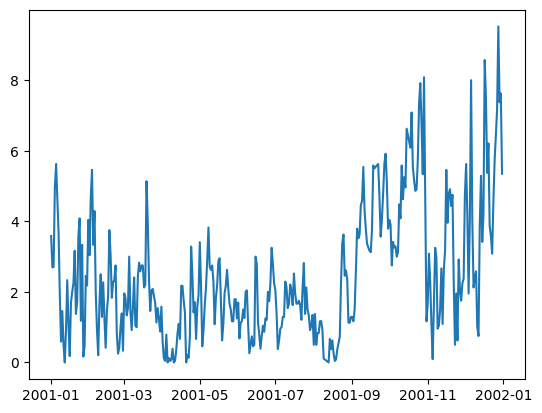

In [150]:
print(len(pollution_phoenix_SO2))
plt.figure
plt.plot(pollution_phoenix_SO2, label = '')
plt.show()

As it can be seen, the highest level of SO2 pollutant can be found during the last months of the year, corresponding to the Winter months. High concentrations of Sulfur Dioxide can occur, such as for the NO2 pollutant, due to fossil fuel combustion, winter weather conditions and vehicles emissions.

In addition, the same arguments made above will now be made for the CO pollutant.

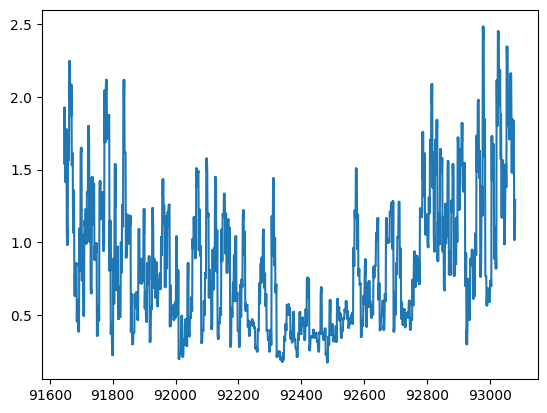

In [151]:
plt.figure
plt.plot(pollution_phoenix['CO Mean'], label = '')
plt.show()

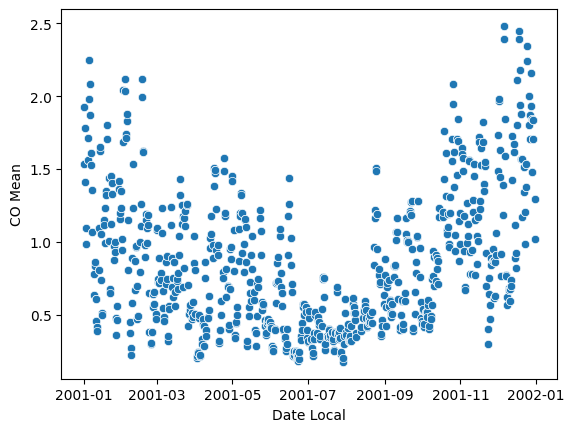

In [152]:
plt.figure()
sns.scatterplot(data = pollution_phoenix, x = 'Date Local', y = 'CO Mean')
plt.show()

In [153]:
pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])
start_date = pd.to_datetime('2001-01-01')
end_date = pd.to_datetime('2001-12-31')
pollution_phoenix = pollution_phoenix[(pollution_phoenix['Date Local'] >= start_date) & (pollution_phoenix['Date Local'] <= end_date)]
pollution_phoenix_CO = pollution_phoenix.groupby(pollution_phoenix['Date Local'].dt.date)['CO Mean'].first()
pollution_phoenix_CO

Date Local
2001-01-01    1.925000
2001-01-02    1.413043
2001-01-03    1.095833
2001-01-04    1.716667
2001-01-05    2.245833
                ...   
2001-12-27    1.708333
2001-12-28    2.160870
2001-12-29    1.479167
2001-12-30    1.837500
2001-12-31    1.017391
Name: CO Mean, Length: 359, dtype: float64

359


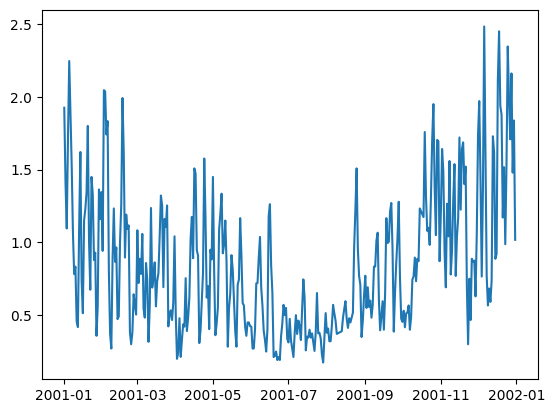

In [154]:
print(len(pollution_phoenix_CO))
plt.figure
plt.plot(pollution_phoenix_CO, label = '')
plt.show()

The same considerations done for the NO2 and the SO2 pollutants are suitable for also the Carbon Monoxide. In fact, high levels of CO pollutant can be found during Winter months, due to fossil fuel combustion, winter weather conditions and vehicles emissions.

More details will now be gone into with graphs that consider a time period referring to the last trimester of the year 2001.

In [155]:
pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])
start_date = pd.to_datetime('2001-10-01')
end_date = pd.to_datetime('2001-12-31')
pollution_phoenix = pollution_phoenix[(pollution_phoenix['Date Local'] >= start_date) & (pollution_phoenix['Date Local'] <= end_date)]
pollution_phoenix_NO2_trimester = pollution_phoenix.groupby(pollution_phoenix['Date Local'].dt.date)['NO2 Mean'].first()
pollution_phoenix_NO2_trimester

Date Local
2001-10-01    21.916667
2001-10-02    24.260870
2001-10-03    16.791667
2001-10-04    21.583333
2001-10-05    21.782609
                ...    
2001-12-27    42.916667
2001-12-28    46.652174
2001-12-29    38.875000
2001-12-30    38.875000
2001-12-31    34.363636
Name: NO2 Mean, Length: 90, dtype: float64

In the United States, the Environmental Protection Agency (EPA) sets limits for air pollutants, including Nitrogen Dioxide (NO2), through the Clean Air Act. The limits are set according to the National Ambient Air Quality Standards (NAAQS), which establishes maximum allowable levels of pollutants in the air to protect public health.
For Nitrogen Dioxide (NO2), the NAAQS provides a primary and a secondary limit:
- Primary limit: the average daily limit for NO2 must not exceed 100 parts per billion (ppb) calculated over a one-hour period
- Secondary limit: the average annual limit of NO2 shall not exceed 53 ppb, calculated over one year

Daily average NO2 values for the last quarter of 2001 are considered in the graph below. In addition, more attention is drawn to the limit of 100 ppb which is the maximum daily limit. With the use of a boolean mask, a check was made to define whether there are values that exceed the limit and then were asked to print these values, if there are, otherwise to print *'There are no values above the treshold'*. 

There are no values that exceed the treshold.


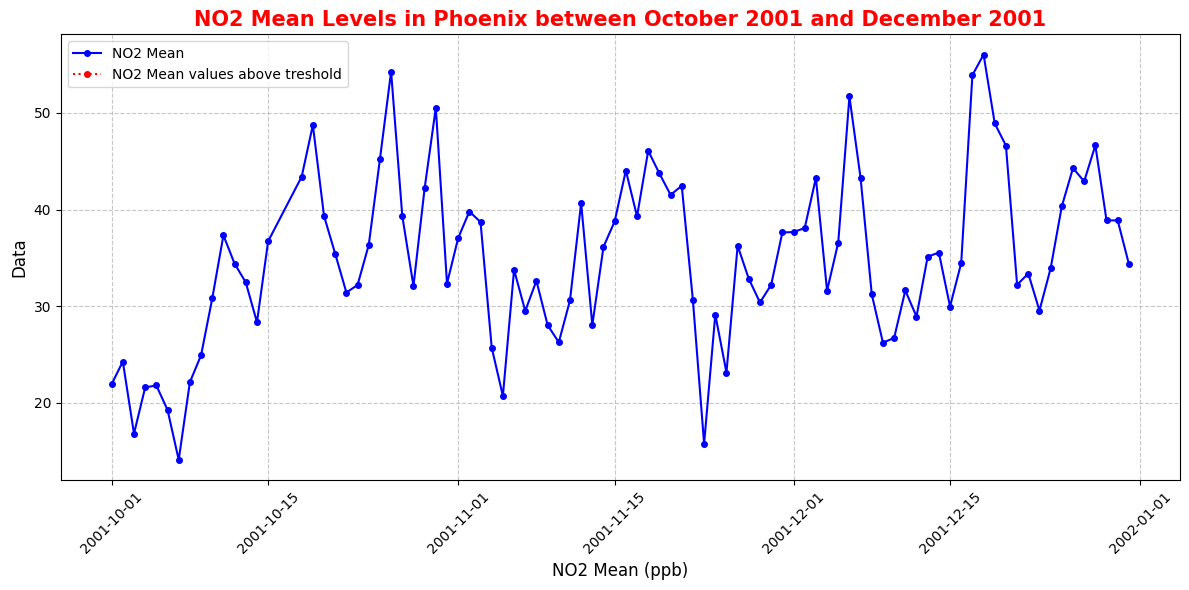

In [156]:
plt.figure(figsize = (12, 6))
plt.plot(pollution_phoenix_NO2_trimester, color = 'blue', linestyle = '-', marker = 'o', markersize = 4, label = 'NO2 Mean')
plt.title('NO2 Mean Levels in Phoenix between October 2001 and December 2001', fontweight = 'bold', fontsize = 15, color = 'red')
plt.ylabel('Data', fontsize = 12)
plt.xlabel('NO2 Mean (ppb)', fontsize = 12)
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

treshold = 100
NO2_alarm = pollution_phoenix_NO2_trimester > treshold 
NO2_red_alarm = pollution_phoenix_NO2_trimester[NO2_alarm]
if len(NO2_red_alarm):
    print('The values above the treshold are:', len(NO2_red_alarm), NO2_red_alarm)
else:
    print('There are no values that exceed the treshold.')
plt.plot(NO2_red_alarm, color = 'red', linestyle = 'dotted', marker = 'o', markersize = 4, label = 'NO2 Mean values above treshold')
plt.legend()


plt.tight_layout()
plt.show()


In [157]:
pollution_phoenix_NO2_2001_mean = pollution_phoenix_NO2.mean()
pollution_phoenix_NO2_2001_mean

28.836456091922003

As mentioned above, the average limit value of NO2 in a year should not exceed 53 ppb. The average of the first measurement of day in 2001 is about 28.84 ppb, which is found to be a fairly good value. In addition, both the primary limit and the secondary limit for the selected period do not have alarming values. 

Now let's visualize the same line graph up here, into a seaborn scatterplot. 

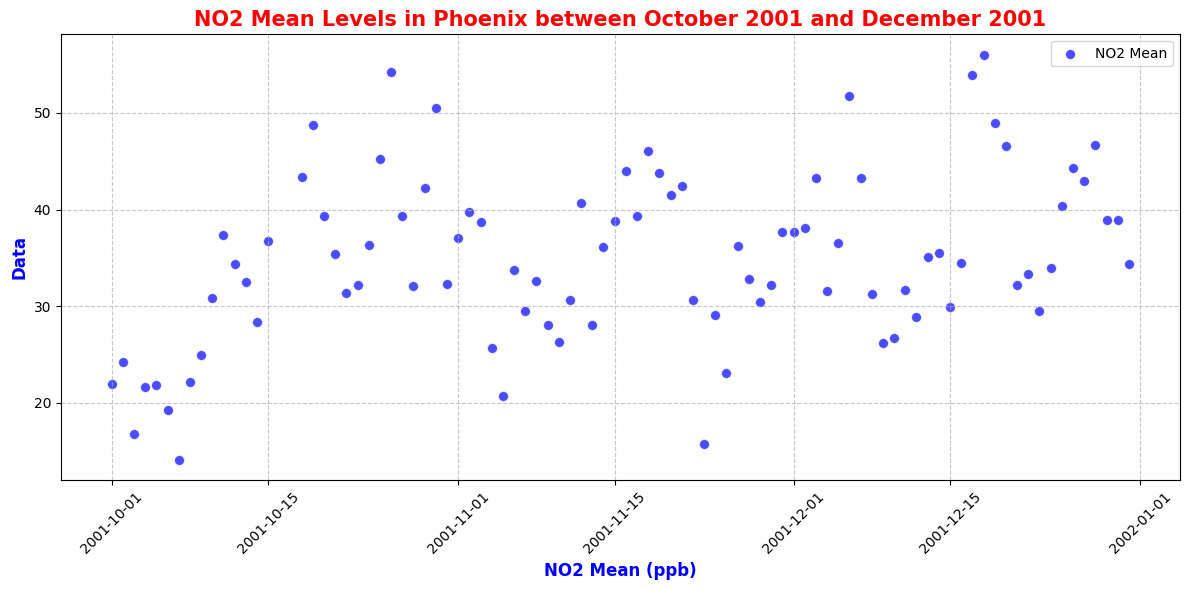

In [158]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data = pollution_phoenix_NO2_trimester.reset_index(), x = pollution_phoenix_NO2_trimester.index, y = 'NO2 Mean', color = 'blue', s = 50, label = 'NO2 Mean', alpha = 0.7)
plt.title('NO2 Mean Levels in Phoenix between October 2001 and December 2001', fontweight = 'bold', fontsize = 15, color = 'red')
plt.ylabel('Data', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.xlabel('NO2 Mean (ppb)', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend()

plt.tight_layout()
plt.show()

The aim of the code below, is allowing to identify the maximum value in the NO2 Mean column of the DataFrame and extract related information such as corresponding values in other columns (SO2 Mean, CO Mean) and the date when this maximum value occurred.

In [159]:
max_NO2_index = pollution_phoenix['NO2 Mean'].idxmax()
max_NO2_SO2 = pollution_phoenix.loc[max_NO2_index, 'SO2 Mean']
max_NO2_CO = pollution_phoenix.loc[max_NO2_index, 'CO Mean']
max_NO2_O3 = pollution_phoenix.loc[max_NO2_index, 'O3 Mean']
max_NO2_date = pollution_phoenix.loc[max_NO2_index, 'Date Local'].date()

print('NO2 Mean max value:', pollution_phoenix['NO2 Mean'].max())
print('SO2 Mean for NO2 Mean max value:', max_NO2_SO2)
print('CO Mean for NO2 Mean max value:', max_NO2_CO)
print('O3 Mean for NO2 Mean max value:', max_NO2_O3)
print("Date:", max_NO2_date)

NO2 Mean max value: 56.045455
SO2 Mean for NO2 Mean max value: 7.478261
CO Mean for NO2 Mean max value: 2.45
O3 Mean for NO2 Mean max value: 0.001545
Date: 2001-12-18


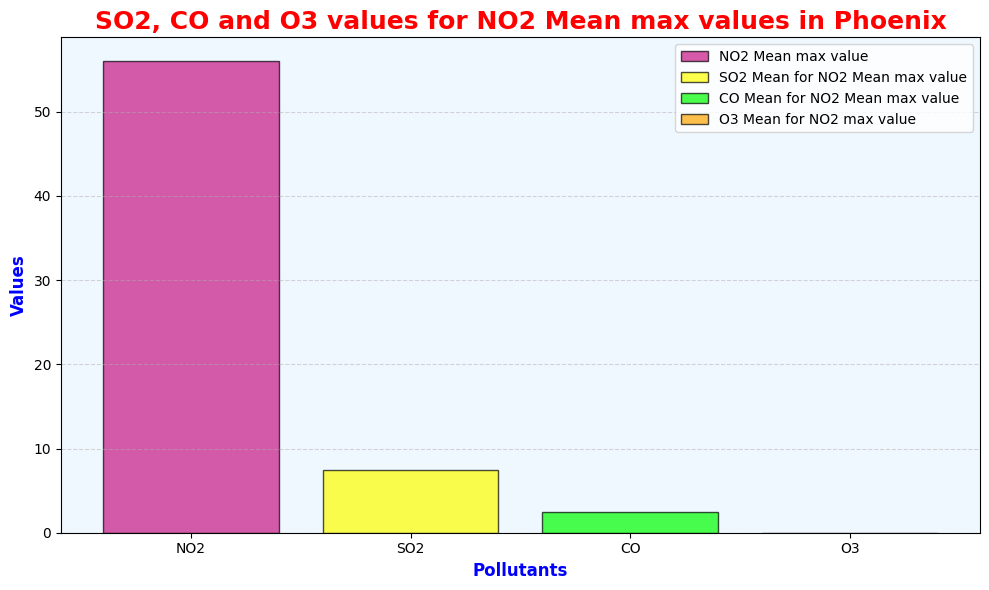

These data are related to day: 2001-12-18


In [160]:
plt.figure(figsize = (10, 6))
plt.bar('NO2', pollution_phoenix['NO2 Mean'].max(), color = '#C71585', edgecolor = 'black', linewidth = 1, alpha = 0.7, label = 'NO2 Mean max value')
plt.bar('SO2', max_NO2_SO2, color = 'yellow', edgecolor = 'black', linewidth = 1, alpha = 0.7, label = 'SO2 Mean for NO2 Mean max value')
plt.bar('CO', max_NO2_CO, color = '#00FF00', edgecolor = 'black', linewidth = 1, alpha = 0.7, label = 'CO Mean for NO2 Mean max value')
plt.bar('O3', max_NO2_O3, color = 'orange', edgecolor = 'black', linewidth = 1, alpha = 0.7, label = 'O3 Mean for NO2 max value')
plt.xlabel('Pollutants', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.ylabel('Values', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.title('SO2, CO and O3 values for NO2 Mean max values in Phoenix', fontsize = 18, fontweight = 'bold', color = 'red')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.gca().set_facecolor('#F0F8FF')
plt.legend()

plt.tight_layout()
plt.show()

print('These data are related to day:', max_NO2_date)

Now, the arguments done for the NO2 pollutant will be made also for the other 2 pollutants which have their maximum values in the Winter months. 

In [161]:
pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])
start_date = pd.to_datetime('2001-10-01')
end_date = pd.to_datetime('2001-12-31')
pollution_phoenix = pollution_phoenix[(pollution_phoenix['Date Local'] >= start_date) & (pollution_phoenix['Date Local'] <= end_date)]
pollution_phoenix_SO2_trimester = pollution_phoenix.groupby(pollution_phoenix['Date Local'].dt.date)['SO2 Mean'].first()
pollution_phoenix_SO2_trimester

Date Local
2001-10-01    4.041667
2001-10-02    3.913043
2001-10-03    2.750000
2001-10-04    3.416667
2001-10-05    3.260870
                ...   
2001-12-27    7.166667
2001-12-28    9.521739
2001-12-29    7.375000
2001-12-30    7.625000
2001-12-31    5.347826
Name: SO2 Mean, Length: 90, dtype: float64

Regarding Sulfur Dioxide (SO2), another common air pollutant, the U.S. National Ambient Air Quality Standards (NAAQS) states:
- Primary limit: the maximum daily allowable limit for sulfur dioxide (SO2) is 75 parts per billion (ppb) calculated on a 1-hour moving average.
- Secondary limit: the maximum annual allowable limit for sulfur dioxide (SO2) is 500 ppb calculated on a 3-hour moving average.

There are no values that exceed the treshold.


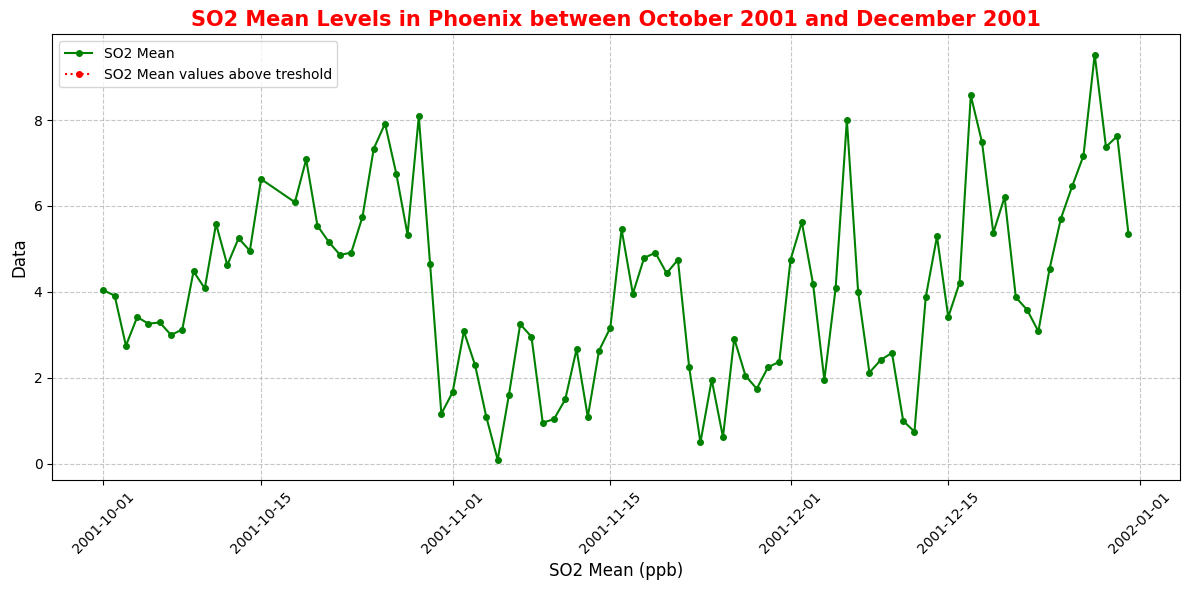

In [162]:
plt.figure(figsize = (12, 6))
plt.plot(pollution_phoenix_SO2_trimester, color = 'green', linestyle = '-', marker = 'o', markersize = 4, label = 'SO2 Mean')
plt.title('SO2 Mean Levels in Phoenix between October 2001 and December 2001', fontweight = 'bold', fontsize = 15, color = 'red')
plt.ylabel('Data', fontsize = 12)
plt.xlabel('SO2 Mean (ppb)', fontsize = 12)
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

treshold = 75
SO2_alarm = pollution_phoenix_SO2_trimester > treshold 
SO2_red_alarm = pollution_phoenix_SO2_trimester[SO2_alarm]
if len(SO2_red_alarm):
    print('The values above the treshold are:', len(SO2_red_alarm), SO2_red_alarm)
else:
    print('There are no values that exceed the treshold.')
plt.plot(SO2_red_alarm, color = 'red', linestyle = 'dotted', marker = 'o', markersize = 4, label = 'SO2 Mean values above treshold')
plt.legend()


plt.tight_layout()
plt.show()

In [163]:
pollution_phoenix_SO2_2001_mean = pollution_phoenix_SO2.mean()
pollution_phoenix_SO2_2001_mean

2.481076242339833

As stated earlier, the annual average limit for SO2 should not exceed 500 ppb. The average of the first daily measurements in 2001 is approximately 2.48 ppb, which is considered extremely satisfactory. Moreover, both the primary and secondary limits for the specified period do not show alarming values.

Now let's visualize the same line graph up here, into a seaborn scatterplot. 

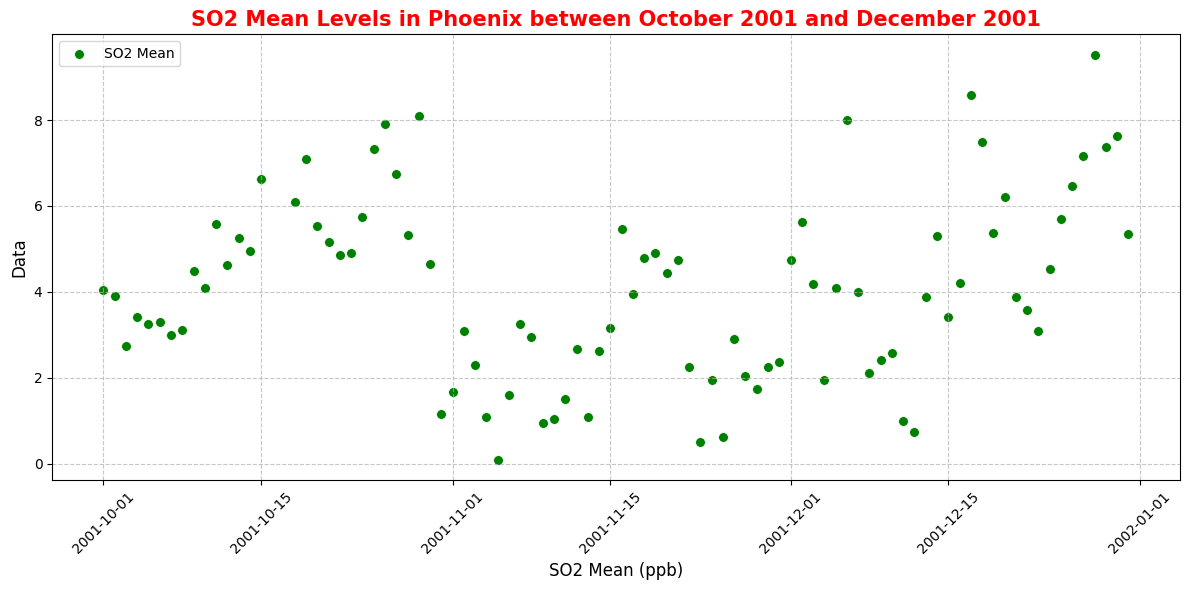

In [164]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data = pollution_phoenix_SO2_trimester.reset_index(), x = pollution_phoenix_SO2_trimester.index, y = 'SO2 Mean', color = 'green', s = 50, label = 'SO2 Mean')
plt.title('SO2 Mean Levels in Phoenix between October 2001 and December 2001', fontweight = 'bold', fontsize = 15, color = 'red')
plt.ylabel('Data', fontsize = 12)
plt.xlabel('SO2 Mean (ppb)', fontsize = 12)
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend()

plt.tight_layout()
plt.show()

In [165]:
max_SO2_index = pollution_phoenix['SO2 Mean'].idxmax()
max_SO2_NO2 = pollution_phoenix.loc[max_SO2_index, 'NO2 Mean']
max_SO2_CO = pollution_phoenix.loc[max_SO2_index, 'CO Mean']
max_SO2_O3 = pollution_phoenix.loc[max_SO2_index, 'O3 Mean']
max_SO2_date = pollution_phoenix.loc[max_SO2_index, 'Date Local'].date()

print('SO2 Mean max value:', pollution_phoenix['SO2 Mean'].max())
print('NO2 Mean for SO2 Mean max value:', max_SO2_NO2)
print('CO Mean for SO2 Mean max value:', max_SO2_CO)
print('O3 Mean for SO2 Mean max value:', max_SO2_O3)
print("Date:", max_SO2_date)

SO2 Mean max value: 9.685714
NO2 Mean for SO2 Mean max value: 46.652174
CO Mean for SO2 Mean max value: 2.16087
O3 Mean for SO2 Mean max value: 0.00175
Date: 2001-12-28


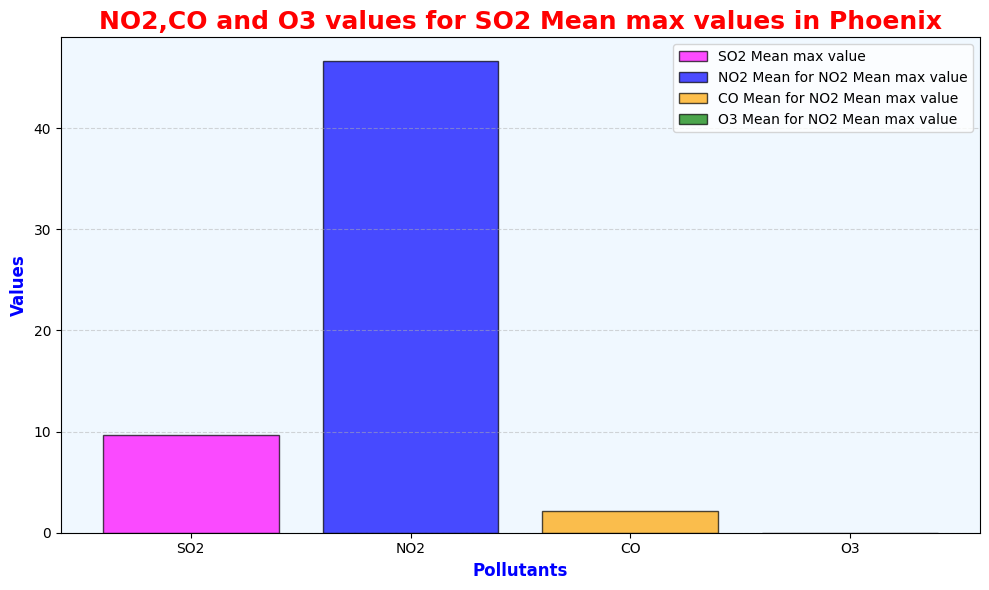

These data are related to day: 2001-12-28


In [166]:
plt.figure(figsize = (10, 6))
plt.bar('SO2', pollution_phoenix['SO2 Mean'].max(), color = '#FF00FF', edgecolor = 'black', linewidth = 1, alpha = 0.7, label = 'SO2 Mean max value')
plt.bar('NO2', max_SO2_NO2, color = '#0000FF', edgecolor = 'black', linewidth = 1, alpha = 0.7, label = 'NO2 Mean for NO2 Mean max value')
plt.bar('CO', max_SO2_CO, color = '#FFA500', edgecolor = 'black', linewidth = 1, alpha = 0.7, label = 'CO Mean for NO2 Mean max value')
plt.bar('O3', max_SO2_O3, color = 'green', edgecolor = 'black', linewidth = 1, alpha = 0.7, label = 'O3 Mean for NO2 Mean max value')
plt.xlabel('Pollutants', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.ylabel('Values', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.title('NO2,CO and O3 values for SO2 Mean max values in Phoenix', fontsize = 18, fontweight = 'bold', color = 'red')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.gca().set_facecolor('#F0F8FF')
plt.legend()

plt.tight_layout()
plt.show()

print('These data are related to day:', max_SO2_date)

In [167]:
pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])
start_date = pd.to_datetime('2001-10-01')
end_date = pd.to_datetime('2001-12-31')
pollution_phoenix = pollution_phoenix[(pollution_phoenix['Date Local'] >= start_date) & (pollution_phoenix['Date Local'] <= end_date)]
pollution_phoenix_CO_trimester = pollution_phoenix.groupby(pollution_phoenix['Date Local'].dt.date)['CO Mean'].first()
pollution_phoenix_CO_trimester

Date Local
2001-10-01    0.454167
2001-10-02    0.530435
2001-10-03    0.416667
2001-10-04    0.512500
2001-10-05    0.517391
                ...   
2001-12-27    1.708333
2001-12-28    2.160870
2001-12-29    1.479167
2001-12-30    1.837500
2001-12-31    1.017391
Name: CO Mean, Length: 90, dtype: float64

Regarding carbon monoxide (CO), a common air pollutant, the U.S. National Ambient Air Quality Standards (NAAQS) states:
- Primary limit: the maximum daily allowable limit for carbon monoxide (CO) is 9 parts per million (ppm) calculated over an 8-hour moving average.
- Secondary limit: the maximum annual allowable limit for carbon monoxide (CO) is 35 ppm calculated on a 1-hour moving average.

There are no values that exceed the treshold.


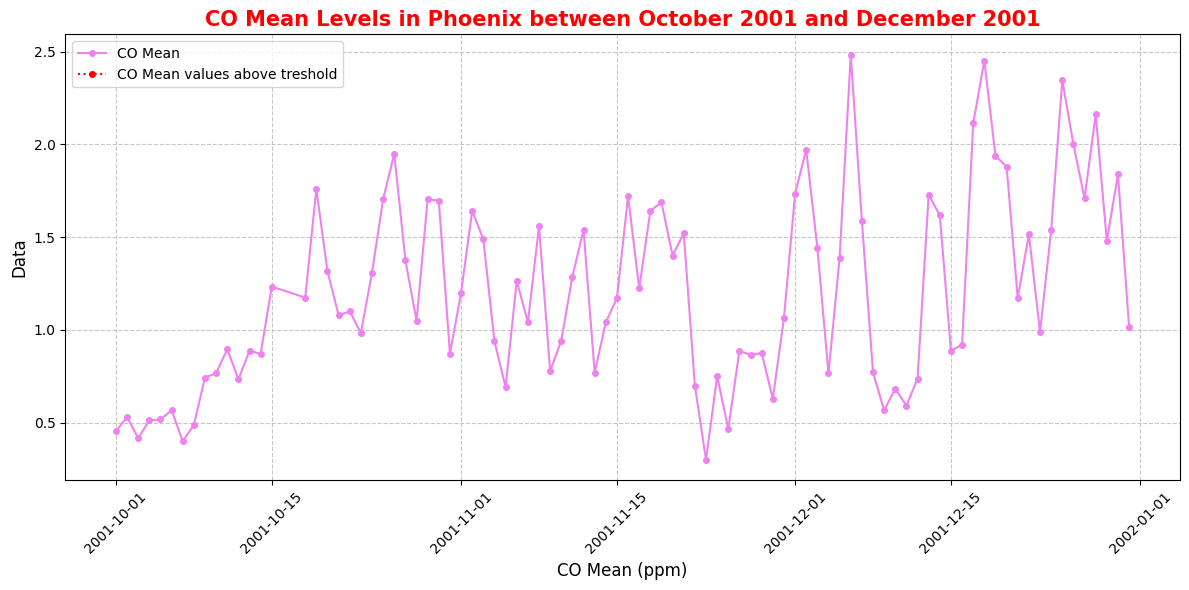

In [168]:
plt.figure(figsize = (12, 6))
plt.plot(pollution_phoenix_CO_trimester, color = 'violet', linestyle = '-', marker = 'o', markersize = 4, label = 'CO Mean')
plt.title('CO Mean Levels in Phoenix between October 2001 and December 2001', fontweight = 'bold', fontsize = 15, color = 'red')
plt.ylabel('Data', fontsize = 12)
plt.xlabel('CO Mean (ppm)', fontsize = 12)
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

treshold = 9
CO_alarm = pollution_phoenix_CO_trimester > treshold 
CO_red_alarm = pollution_phoenix_CO_trimester[CO_alarm]
if len(CO_red_alarm):
    print('The values above the treshold are:', len(CO_red_alarm), CO_red_alarm)
else:
    print('There are no values that exceed the treshold.')
plt.plot(CO_red_alarm, color = 'red', linestyle = 'dotted', marker = 'o', markersize = 4, label = 'CO Mean values above treshold')
plt.legend()


plt.tight_layout()
plt.show()

In [169]:
pollution_phoenix_CO_2001_mean = pollution_phoenix_CO.mean()
pollution_phoenix_CO_2001_mean

0.8553358774373258

Now let's visualize the same line graph up here, into a seaborn scatterplot. 

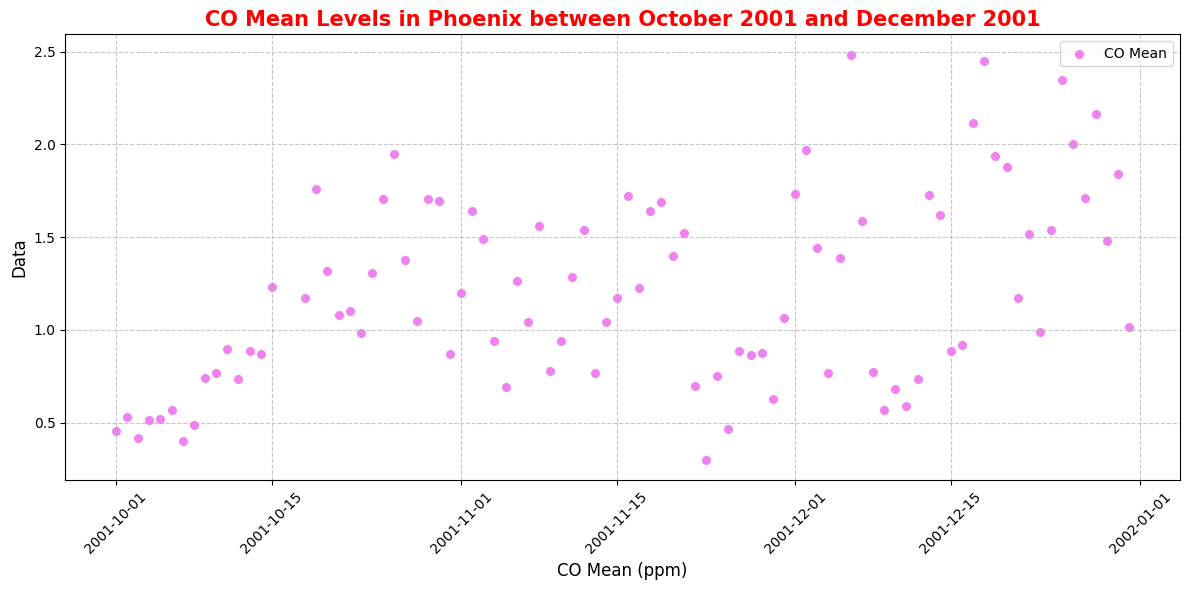

In [170]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data = pollution_phoenix_CO_trimester.reset_index(), x = pollution_phoenix_CO_trimester.index, y = 'CO Mean', color = 'violet', s = 50, label = 'CO Mean')
plt.title('CO Mean Levels in Phoenix between October 2001 and December 2001', fontweight = 'bold', fontsize = 15, color = 'red')
plt.ylabel('Data', fontsize = 12)
plt.xlabel('CO Mean (ppm)', fontsize = 12)
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend()

plt.tight_layout()
plt.show()

In [171]:
max_CO_index = pollution_phoenix['CO Mean'].idxmax()
max_CO_NO2 = pollution_phoenix.loc[max_CO_index, 'NO2 Mean']
max_CO_SO2 = pollution_phoenix.loc[max_CO_index, 'SO2 Mean']
max_CO_O3 = pollution_phoenix.loc[max_CO_index, 'O3 Mean']
max_CO_date = pollution_phoenix.loc[max_CO_index, 'Date Local'].date()

print('CO Mean max value:', pollution_phoenix['CO Mean'].max())
print('NO2 Mean for CO Mean max value:', max_CO_NO2)
print('SO2 Mean for CO Mean max value:', max_CO_SO2)
print('O3 Mean for CO Mean max value:', max_CO_O3)
print("Date:", max_CO_date)

CO Mean max value: 2.483333
NO2 Mean for CO Mean max value: 51.708333
SO2 Mean for CO Mean max value: 8.0
O3 Mean for CO Mean max value: 0.002958
Date: 2001-12-06


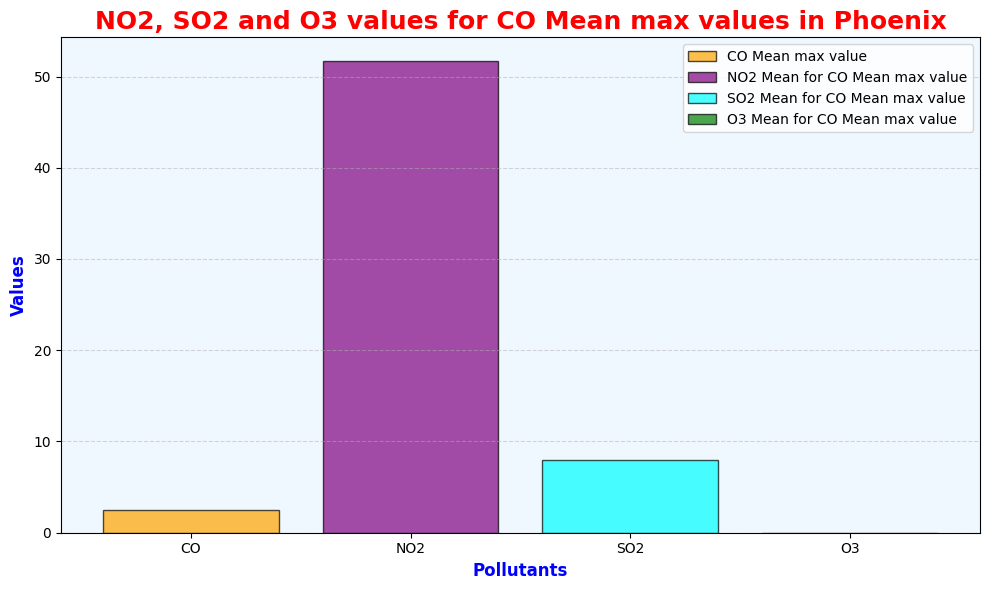

These data are related to day: 2001-12-06


In [172]:
plt.figure(figsize = (10, 6))
plt.bar('CO', pollution_phoenix['CO Mean'].max(), color = '#FFA500', edgecolor = 'black', linewidth = 1, alpha = 0.7, label = 'CO Mean max value')
plt.bar('NO2', max_CO_NO2, color = '#800080', edgecolor = 'black', linewidth = 1, alpha = 0.7, label = 'NO2 Mean for CO Mean max value')
plt.bar('SO2', max_CO_SO2, color = '#00FFFF', edgecolor = 'black', linewidth = 1, alpha = 0.7, label = 'SO2 Mean for CO Mean max value')
plt.bar('O3', max_CO_O3, color = 'green', edgecolor = 'black', linewidth = 1, alpha = 0.7, label ='O3 Mean for CO Mean max value')
plt.xlabel('Pollutants', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.ylabel('Values', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.title('NO2, SO2 and O3 values for CO Mean max values in Phoenix', fontsize = 18, fontweight = 'bold', color = 'red')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.gca().set_facecolor('#F0F8FF')
plt.legend()

plt.tight_layout()
plt.show()

print('These data are related to day:', max_CO_date)

As previously stated, the annual average limit for CO must not surpass 35 ppm. The average of the first daily measurements in 2001 is approximately 0.86 ppm, signifying an exceptionally satisfactory level. Additionally, both the primary and secondary limits for the specified period exhibit no cause for concern. 

To sum up ... 

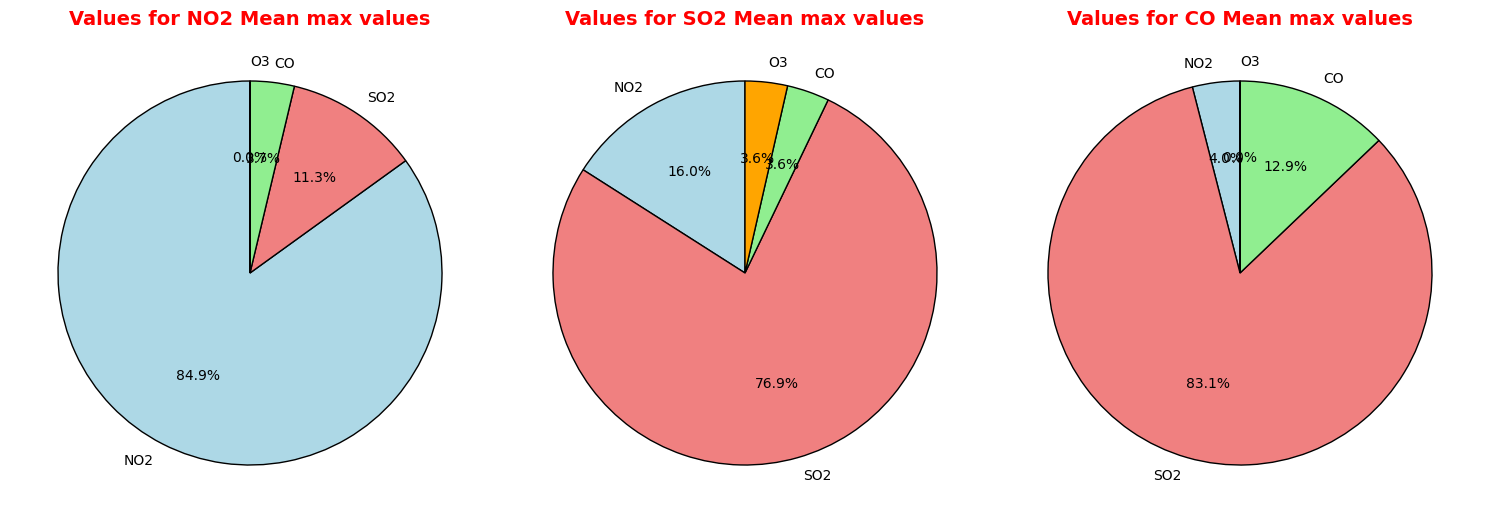

In [173]:
fig, axs = plt.subplots(1, 3, figsize = (15, 10))

count1 = [pollution_phoenix['NO2 Mean'].max(), max_NO2_SO2, max_NO2_CO, max_NO2_O3]
count2 = [pollution_phoenix['SO2 Mean'].max(), max_SO2_NO2, max_SO2_CO, max_SO2_CO]
count3 = [pollution_phoenix['CO Mean'].max(), max_CO_NO2, max_CO_SO2, max_CO_O3]
labels = ['NO2', 'SO2', 'CO', 'O3']
colors = ['lightblue', 'lightcoral', 'lightgreen', 'orange'] 

axs[0].pie(count1, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90, wedgeprops = {'edgecolor': 'black'})
axs[0].set_title('Values for NO2 Mean max values', fontsize = 14, fontweight = 'bold', color = 'red')
axs[0].set_aspect('equal')

axs[1].pie(count2, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90, wedgeprops = {'edgecolor': 'black'})
axs[1].set_title('Values for SO2 Mean max values', fontsize = 14, fontweight = 'bold', color = 'red')
axs[1].set_aspect('equal')

axs[2].pie(count3, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90, wedgeprops = {'edgecolor': 'black'})
axs[2].set_title('Values for CO Mean max values', fontsize = 14, fontweight = 'bold', color = 'red')
axs[2].set_aspect('equal')

plt.tight_layout()
plt.show()

Below is correct to show the October-December quarter of pollutant O3, which in the given period has its lowest values. This may demonstrate a negative correlation. 

In [174]:
pollution_phoenix['Date Local'] = pd.to_datetime(pollution_phoenix['Date Local'])
start_date = pd.to_datetime('2001-10-01')
end_date = pd.to_datetime('2001-12-31')
pollution_phoenix = pollution_phoenix[(pollution_phoenix['Date Local'] >= start_date) & (pollution_phoenix['Date Local'] <= end_date)]
pollution_phoenix_O3_trimester = pollution_phoenix.groupby(pollution_phoenix['Date Local'].dt.date)['O3 Mean'].first()
pollution_phoenix_O3_trimester

Date Local
2001-10-01    0.022083
2001-10-02    0.025125
2001-10-03    0.018958
2001-10-04    0.015917
2001-10-05    0.018417
                ...   
2001-12-27    0.003292
2001-12-28    0.001750
2001-12-29    0.001667
2001-12-30    0.007833
2001-12-31    0.005526
Name: O3 Mean, Length: 90, dtype: float64

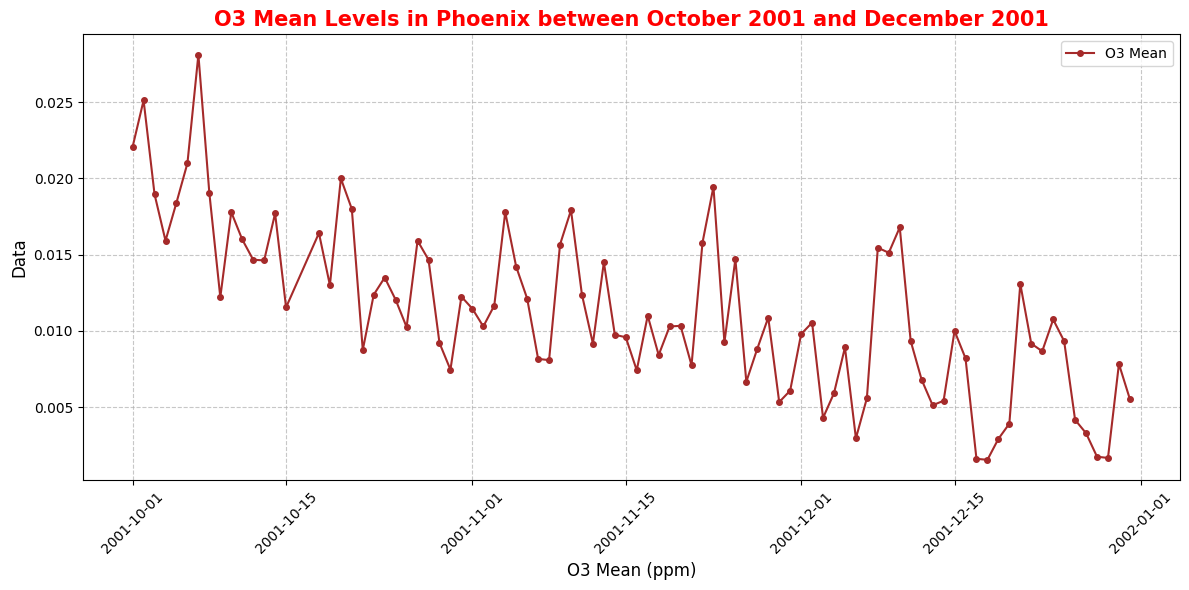

In [175]:
plt.figure(figsize = (12,6))
plt.plot(pollution_phoenix_O3_trimester, color = 'brown', linestyle = '-', marker = 'o', markersize = 4, label = 'O3 Mean')
plt.title('O3 Mean Levels in Phoenix between October 2001 and December 2001', fontweight = 'bold', fontsize = 15, color = 'red')
plt.ylabel('Data', fontsize = 12)
plt.xlabel('O3 Mean (ppm)', fontsize = 12)
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend()
plt.tight_layout()
plt.show()

Now let's visualize the same line graph up here, into a seaborn scatterplot. 

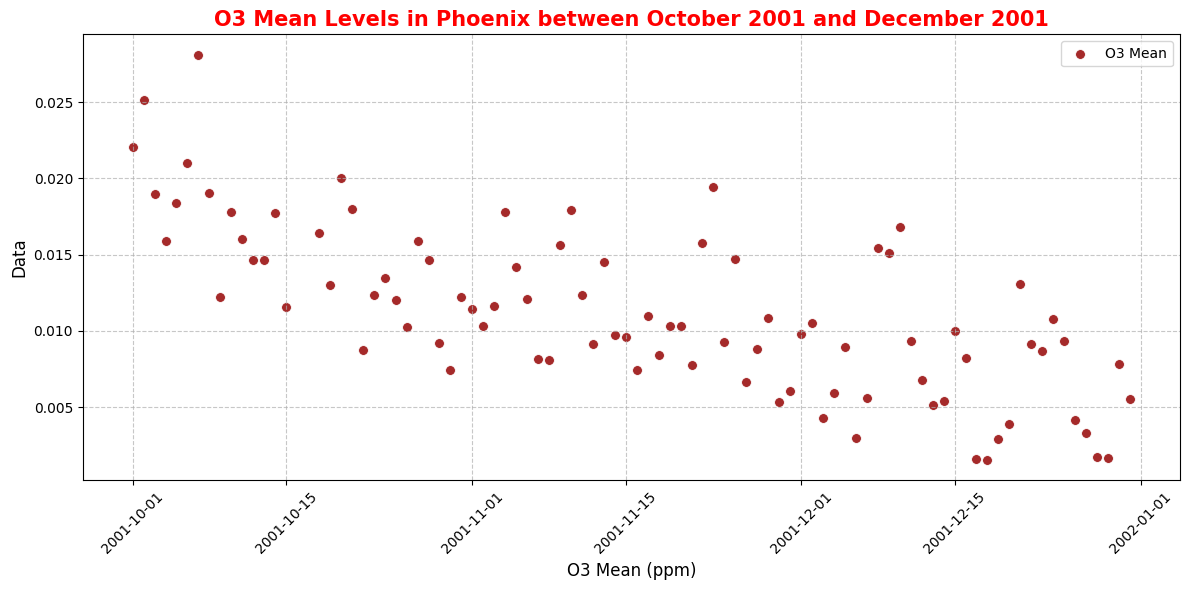

In [176]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data = pollution_phoenix_O3_trimester.reset_index(), x = pollution_phoenix_O3_trimester.index, y = 'O3 Mean', color = 'brown', s = 50, label = 'O3 Mean')
plt.title('O3 Mean Levels in Phoenix between October 2001 and December 2001', fontweight = 'bold', fontsize = 15, color = 'red')
plt.ylabel('Data', fontsize = 12)
plt.xlabel('O3 Mean (ppm)', fontsize = 12)
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend()

plt.tight_layout()
plt.show()

Here to demonstrate that the minimum value is during the considered months. 

In [177]:
min_O3_index = pollution_phoenix['O3 Mean'].idxmin()
min_O3_date = pollution_phoenix.loc[min_O3_index, 'Date Local'].date()
print('The day which has the minimum value of O3 is:', min_O3_date)

The day which has the minimum value of O3 is: 2001-12-18


Now, it is checked for the day which has the minimum value of O3, the values of the other pollutants as it was done before.

In [178]:
min_O3_index = pollution_phoenix['O3 Mean'].idxmin()
min_O3_NO2 = pollution_phoenix.loc[min_O3_index, 'NO2 Mean']
min_O3_SO2 = pollution_phoenix.loc[min_O3_index, 'SO2 Mean']
min_O3_CO = pollution_phoenix.loc[min_O3_index, 'CO Mean']
min_O3_date = pollution_phoenix.loc[min_O3_index, 'Date Local'].date()

print('O3 Mean min value:', pollution_phoenix['O3 Mean'].min())
print('NO2 Mean for O3 Mean min value:', min_O3_NO2)
print('SO2 Mean for O3 Mean min value:', min_O3_SO2)
print('CO Mean for O3 Mean min value:', min_O3_CO)
print("Date:", min_O3_date)

O3 Mean min value: 0.001545
NO2 Mean for O3 Mean min value: 56.045455
SO2 Mean for O3 Mean min value: 7.478261
CO Mean for O3 Mean min value: 2.45
Date: 2001-12-18


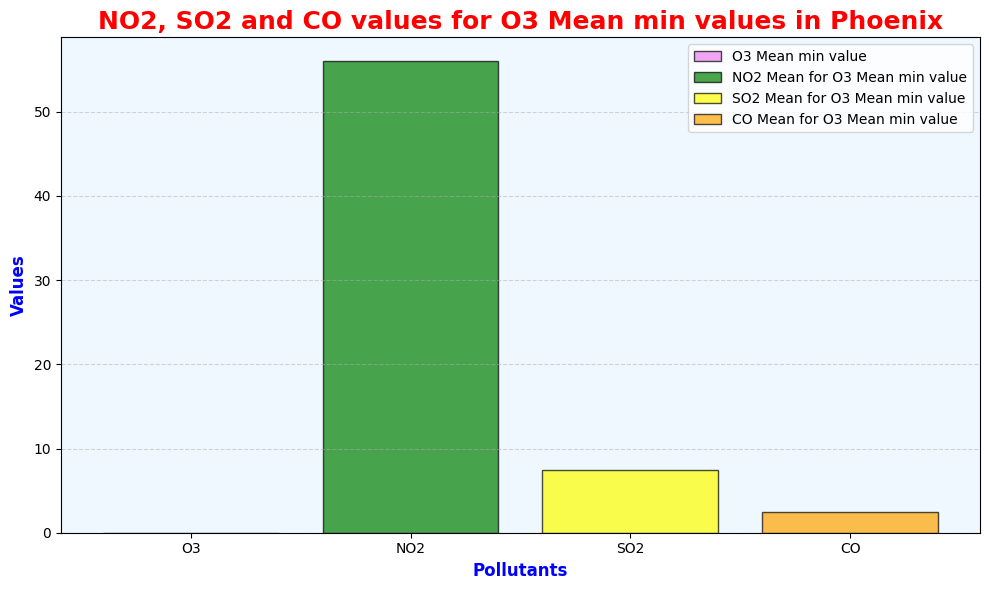

These data are related to day: 2001-12-18


In [179]:
plt.figure(figsize = (10, 6))
plt.bar('O3', pollution_phoenix['O3 Mean'].min(), color = 'violet', edgecolor = 'black', linewidth = 1, alpha = 0.7, label = 'O3 Mean min value')
plt.bar('NO2', min_O3_NO2, color = 'green', edgecolor = 'black', linewidth = 1, alpha = 0.7, label = 'NO2 Mean for O3 Mean min value')
plt.bar('SO2', min_O3_SO2, color = 'yellow', edgecolor = 'black', linewidth = 1, alpha = 0.7, label = 'SO2 Mean for O3 Mean min value')
plt.bar('CO', min_O3_CO, color = 'orange', edgecolor = 'black', linewidth = 1, alpha = 0.7, label ='CO Mean for O3 Mean min value')
plt.xlabel('Pollutants', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.ylabel('Values', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.title('NO2, SO2 and CO values for O3 Mean min values in Phoenix', fontsize = 18, fontweight = 'bold', color = 'red')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.gca().set_facecolor('#F0F8FF')
plt.legend()

plt.tight_layout()
plt.show()

print('These data are related to day:', min_O3_date)

After this, the analysis conducted on pollutants such as NO2, SO2, and CO for the year 2001 suggests the presence of possible seasonality in each year considered within the dataset. This hypothesis is supported by the fact that, in Winter, meteorological conditions characterized by lower temperatures tend to lead to an increase in the emission of these pollutants, given the greater demand for energy for both domestic and vehicular heating. To confirm this hypothesis, appropriate graphs will be presented to highlight this correlation. 

In particular, correlation is a statistical measure that describes the strength and direction of a linear relationship between two variables. The Pearson correlation coefficient, denoted as "r", ranges from -1 to 1, where:
- r close to 1 indicates a strong positive correlation
- r close to -1 indicates a strong negative correlation
- r close to 0 indicates a weak or absent correlation

Taking the highest correlation value is important because it indicates a stronger relationship between variables, suggesting that they vary together more consistently. 

To start with correlations, it's important to have a general idea of the possible correlations within the entire dataset:

In [180]:
pollution_df_corr = pollution_df.corr(numeric_only = True)
pollution_df_corr

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
NO2 Mean,1.000000,0.904383,0.112540,0.905418,-0.432650,-0.151998,0.027303,-0.082361,0.348186,0.281954,0.117438,0.208912,0.641828,0.639020,0.186196,0.661030
NO2 1st Max Value,0.904383,1.000000,0.147918,0.997859,-0.291832,0.009866,0.022406,0.048743,0.301599,0.262012,0.131040,0.196581,0.563316,0.606580,0.231430,0.611548
NO2 1st Max Hour,0.112540,0.147918,1.000000,0.147136,-0.203151,-0.090507,-0.125653,-0.086782,0.027148,0.021742,0.173731,0.014905,0.060253,0.079613,0.381236,0.057662
NO2 AQI,0.905418,0.997859,0.147136,1.000000,-0.291720,0.010320,0.022352,0.049027,0.305201,0.265070,0.129903,0.199018,0.566264,0.609375,0.230857,0.614443
O3 Mean,-0.432650,-0.291832,-0.203151,-0.291720,1.000000,0.860622,0.045752,0.768771,-0.110401,-0.072470,-0.083162,-0.050117,-0.339426,-0.343399,-0.199270,-0.355314
O3 1st Max Value,-0.151998,0.009866,-0.090507,0.010320,0.860622,1.000000,0.055518,0.931867,-0.016075,0.025376,-0.015759,0.024411,-0.182691,-0.164323,-0.097012,-0.179301
O3 1st Max Hour,0.027303,0.022406,-0.125653,0.022352,0.045752,0.055518,1.000000,0.048395,0.026509,0.027527,-0.024952,0.020853,0.006843,0.001259,-0.096525,0.008648
O3 AQI,-0.082361,0.048743,-0.086782,0.049027,0.768771,0.931867,0.048395,1.000000,0.015523,0.044307,0.000883,0.036757,-0.129736,-0.120001,-0.078250,-0.130092
SO2 Mean,0.348186,0.301599,0.027148,0.305201,-0.110401,-0.016075,0.026509,0.015523,1.000000,0.828450,0.129434,0.586077,0.215216,0.189973,0.054017,0.204040
SO2 1st Max Value,0.281954,0.262012,0.021742,0.265070,-0.072470,0.025376,0.027527,0.044307,0.828450,1.000000,0.136979,0.813960,0.149397,0.144398,0.043691,0.149963


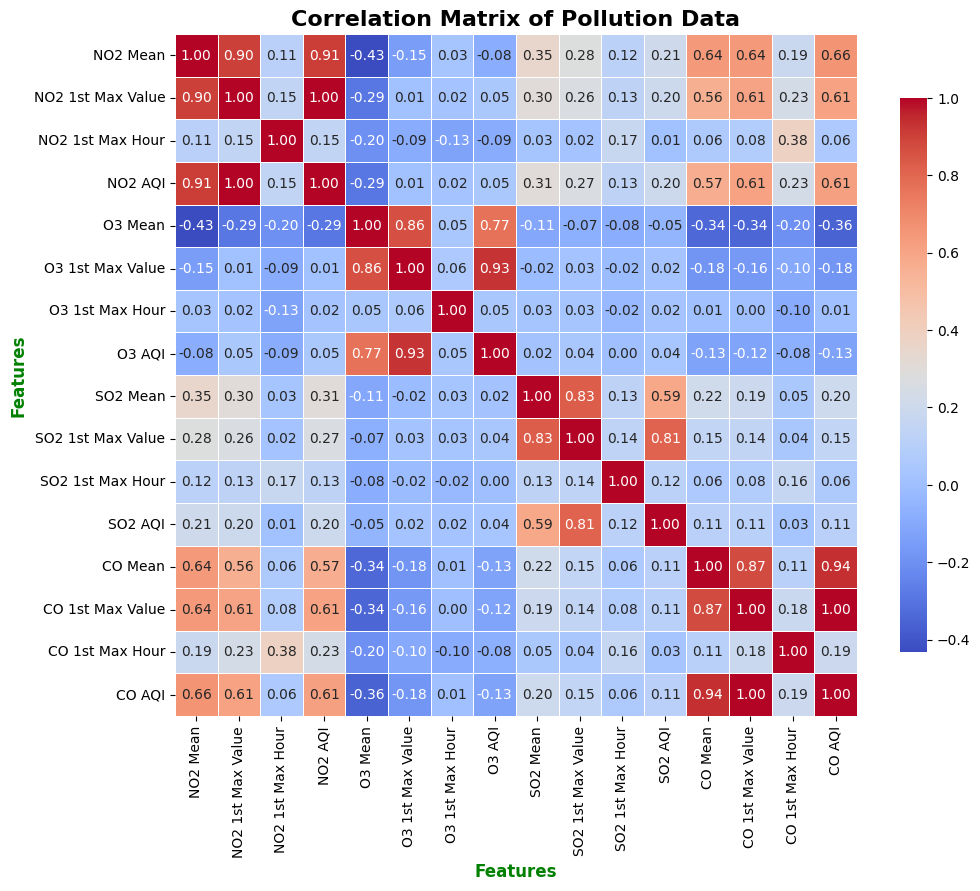

In [181]:
plt.figure(figsize = (11, 9))
sns.heatmap(pollution_df_corr, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5, square = True, cbar_kws = {"shrink": 0.8})
plt.title('Correlation Matrix of Pollution Data', fontsize = 16, fontweight = 'bold', color = 'black')
plt.xlabel('Features', fontsize = 12, fontweight = 'bold', color = 'green')
plt.ylabel('Features', fontsize = 12, fontweight = 'bold', color = 'green')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Since there's an overwhelming amount of data, visualizing it all at once is impractical and do not provide meaningful insights. So it can be useful to focus only on Phoenix as it was done before.

In [182]:
pollution_phoenix_corr = pollution_phoenix.corr(numeric_only = True)
pollution_phoenix_corr

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
NO2 Mean,1.000000,0.888371,0.203976,0.886554,-0.684573,-0.478887,0.096823,-0.471946,0.686417,0.751245,0.261394,0.448063,0.861356,0.739268,0.145964,0.800636
NO2 1st Max Value,0.888371,1.000000,0.278989,0.999025,-0.448561,-0.222938,0.056518,-0.215387,0.642043,0.758995,0.332376,0.454122,0.798489,0.757480,0.248299,0.764561
NO2 1st Max Hour,0.203976,0.278989,1.000000,0.273208,-0.189201,-0.061519,0.075630,-0.059332,0.093739,0.204729,0.545712,0.117679,0.145192,0.178769,0.405423,0.064317
NO2 AQI,0.886554,0.999025,0.273208,1.000000,-0.440800,-0.222405,0.050855,-0.214789,0.644857,0.756564,0.328560,0.452051,0.795805,0.754210,0.243079,0.760841
O3 Mean,-0.684573,-0.448561,-0.189201,-0.440800,1.000000,0.892158,-0.051415,0.890686,-0.360316,-0.409734,-0.251617,-0.247348,-0.658679,-0.489848,-0.115498,-0.564217
O3 1st Max Value,-0.478887,-0.222938,-0.061519,-0.222405,0.892158,1.000000,0.042044,0.999534,-0.229582,-0.226690,-0.141463,-0.134907,-0.512056,-0.316870,-0.004917,-0.397361
O3 1st Max Hour,0.096823,0.056518,0.075630,0.050855,-0.051415,0.042044,1.000000,0.040226,0.078510,0.049856,0.003530,0.031419,0.055549,0.044122,0.044404,0.047102
O3 AQI,-0.471946,-0.215387,-0.059332,-0.214789,0.890686,0.999534,0.040226,1.000000,-0.221289,-0.218751,-0.142140,-0.130102,-0.506330,-0.311262,-0.005324,-0.391524
SO2 Mean,0.686417,0.642043,0.093739,0.644857,-0.360316,-0.229582,0.078510,-0.221289,1.000000,0.866016,0.222749,0.498823,0.676456,0.599510,0.185691,0.606546
SO2 1st Max Value,0.751245,0.758995,0.204729,0.756564,-0.409734,-0.226690,0.049856,-0.218751,0.866016,1.000000,0.325927,0.730245,0.713904,0.710678,0.276706,0.678435


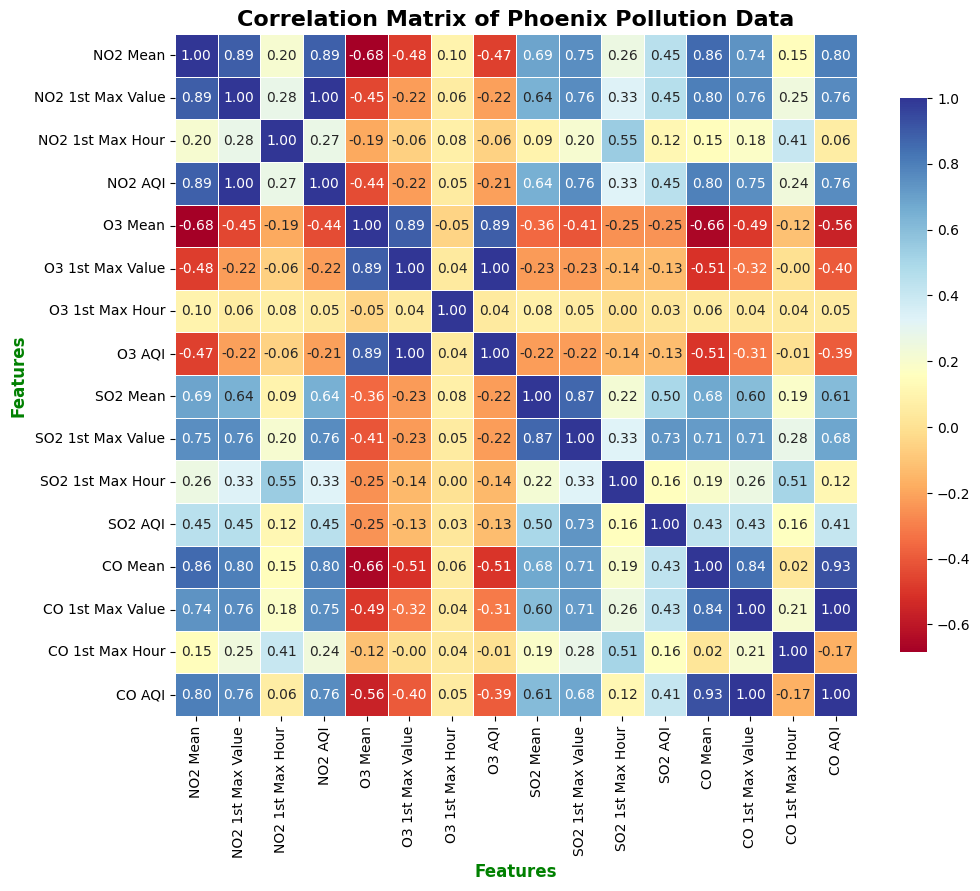

In [183]:
plt.figure(figsize = (11, 9))
sns.heatmap(pollution_phoenix_corr, annot = True, cmap = "RdYlBu", fmt = ".2f", linewidths = 0.5, square = True, cbar_kws = {"shrink": 0.8})
plt.title('Correlation Matrix of Phoenix Pollution Data', fontsize = 16, fontweight = 'bold', color = 'black')
plt.xlabel('Features', fontsize = 12, fontweight = 'bold', color = 'green')
plt.ylabel('Features', fontsize = 12, fontweight = 'bold', color = 'green')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

As it can be seen, a heat map is a visual representation of data in the form of a two-dimensional matrix where values are depicted using colors. This tool is used to examine the relationship between two sets of data, highlighting patterns, trends, and correlations through color usage. The cells of the matrix are colored based on the values they represent, with lighter colors indicating lower values and darker colors indicating higher values. In summary, a heat map is a useful visualization for analyzing and interpreting data in a clear and intuitive manner which is an essential skill of a data scientist.

Given the consideration of the three pollutants NO2, SO2, and CO, which are known to exhibit seasonal peaks during Winter, the next step will involve calculating their correlation using the *.corr()* code.

In [184]:
print('The correlation between Nitrogen Dioxide and Sulfur Dioxide is:', pollution_phoenix['NO2 Mean'].corr(pollution_phoenix['SO2 Mean']))

The correlation between Nitrogen Dioxide and Sulfur Dioxide is: 0.6864174171926198


In [185]:
print('The correlation between Nitrogen Dioxide and Carbon Monoxide is:', pollution_phoenix['NO2 Mean'].corr(pollution_phoenix['CO Mean']))

The correlation between Nitrogen Dioxide and Carbon Monoxide is: 0.8613564171498811


In [186]:
print('The correlation between Sulfur Dioxide and Carbon Monoxide is:', pollution_phoenix['SO2 Mean'].corr(pollution_phoenix['CO Mean']))

The correlation between Sulfur Dioxide and Carbon Monoxide is: 0.6764558843952581


The result of the correlation between A and B is the same as the correlation between B and A. This means that the correlation coefficient between A and B is equal to the correlation coefficient between B and A. This principle is known as the symmetry property of correlation. So calculating the correlation value by swapping the subjects is pointless.

To recall what said before about the possibility of a negative correlation between the O3 pollutant and the others 'Winter' pollutant, here below there's a check about it.

In [187]:
print('The correlation between Nitrogen Dioxide and Ozone is:', pollution_phoenix['NO2 Mean'].corr(pollution_phoenix['O3 Mean']))

The correlation between Nitrogen Dioxide and Ozone is: -0.6845728635693324


In [188]:
print('The correlation between Ozone and Sulfur Dioxide is:', pollution_phoenix['O3 Mean'].corr(pollution_phoenix['SO2 Mean']))

The correlation between Ozone and Sulfur Dioxide is: -0.3603155947799906


In [189]:
print('The correlation between Ozone and Carbon Monoxide is:', pollution_phoenix['O3 Mean'].corr(pollution_phoenix['CO Mean']))

The correlation between Ozone and Carbon Monoxide is: -0.6586792934572526


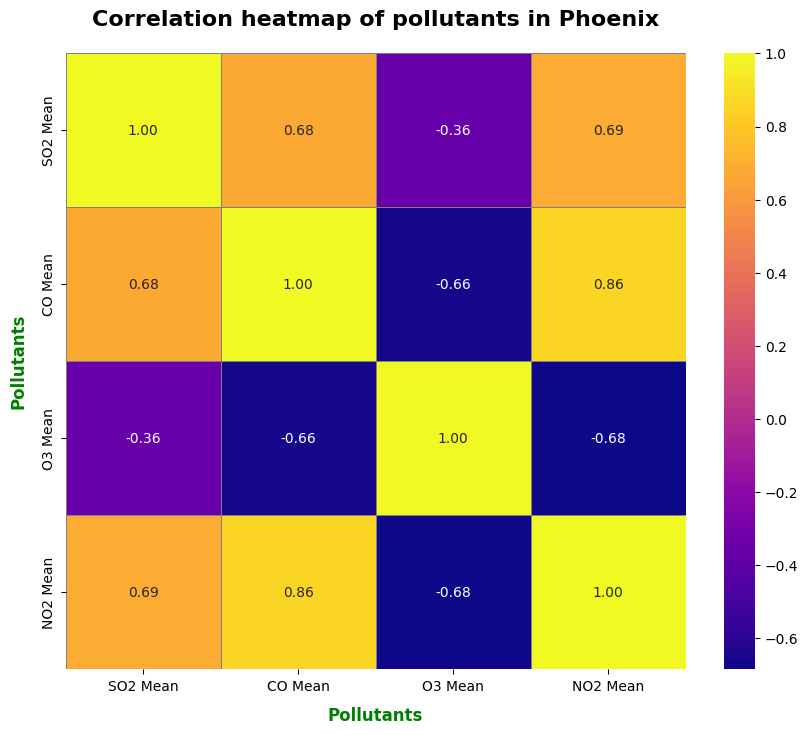

In [190]:
pollutants = pollution_phoenix[['SO2 Mean', 'CO Mean', 'O3 Mean', 'NO2 Mean']]
correlation_matrix = pollutants.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'plasma', fmt = ".2f", linewidths = 0.5, linecolor = 'gray')
plt.title('Correlation heatmap of pollutants in Phoenix', fontsize = 16, fontweight = 'bold', color = 'black', pad = 20)
plt.xlabel('Pollutants', fontsize = 12, fontweight = 'bold', color = 'green', labelpad = 10)
plt.ylabel('Pollutants', fontsize = 12, fontweight = 'bold', color = 'green', labelpad = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

What was suspected is true, in fact there is a quite strong negative correlation in particular between NO2 and O3.

Since for a heatmap visualization, the correlation values are represented in a grid-like format, where each cell corresponds to the correlation between two variables. In this case, using a DataFrame allows for easy organization and access to these correlation values, facilitating their conversion into a format suitable for plotting as a heatmap using libraries like seaborn and matplotlib.

In order to better have an idea of where is Phoenix, it is useful to import the *folium* library and thanks to the videos linked below, creating a map.

https://www.youtube.com/watch?v=SgacOaHoJLs 

https://www.youtube.com/watch?v=CTe8rk9KBdw 



In [191]:
import folium

In [192]:
map = folium.Map(location = [34.048927, -111.093735], zoom_start = 6) 
folium.Marker(location = [33.448377, -112.074037], popup = '<strong>Phoenix</strong>', tooltip = 'click for information').add_to(map)
folium.GeoJson('map.geojson').add_to(map)
map 

**PART 2: Find a model that explains the data.**  

For this part you can use any tool you are familiar with, be it statistical methods, machine learning or even deep learning. 

Possible ideas: 
- regression model if you are trying to predict continuous values 
- classification model when you have discrete and finite labels 
- clustering if you want to find underlying structures of data, without prior information

In this case, due to the quite strong correlation among air pollutants, a regression model is more suitable for predicting pollutant levels. This is because regression models can effectively capture the relationships between these pollutants and provide numerical predictions based on the observed correlations. In contrast, classification or clustering models may not fully utilize the correlation information and may be less effective for predicting continuous pollutant levels.

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

Let's start with the positive correlation between CO and NO2.

In [194]:
x = pollution_phoenix['CO Mean'].to_numpy().reshape(-1, 1)
print(len(x))
print(x)

360
[[0.454167]
 [0.433333]
 [0.454167]
 [0.433333]
 [0.530435]
 [0.541667]
 [0.530435]
 [0.541667]
 [0.416667]
 [0.4375  ]
 [0.416667]
 [0.4375  ]
 [0.5125  ]
 [0.516667]
 [0.5125  ]
 [0.516667]
 [0.517391]
 [0.483333]
 [0.517391]
 [0.483333]
 [0.566667]
 [0.6     ]
 [0.566667]
 [0.6     ]
 [0.4     ]
 [0.420833]
 [0.4     ]
 [0.420833]
 [0.4875  ]
 [0.466667]
 [0.4875  ]
 [0.466667]
 [0.743478]
 [0.566667]
 [0.743478]
 [0.566667]
 [0.766667]
 [0.9375  ]
 [0.766667]
 [0.9375  ]
 [0.895652]
 [0.695833]
 [0.895652]
 [0.695833]
 [0.733333]
 [0.908333]
 [0.733333]
 [0.908333]
 [0.8875  ]
 [0.8125  ]
 [0.8875  ]
 [0.8125  ]
 [0.870833]
 [0.7125  ]
 [0.870833]
 [0.7125  ]
 [1.233333]
 [1.170833]
 [1.233333]
 [1.170833]
 [1.173913]
 [1.204167]
 [1.173913]
 [1.204167]
 [1.758333]
 [1.429167]
 [1.758333]
 [1.429167]
 [1.316667]
 [1.6125  ]
 [1.316667]
 [1.6125  ]
 [1.079167]
 [1.054167]
 [1.079167]
 [1.054167]
 [1.1     ]
 [1.191667]
 [1.1     ]
 [1.191667]
 [0.982609]
 [0.966667]
 [0.982609]


In [195]:
y = pollution_phoenix['NO2 Mean'].to_numpy().reshape(-1, 1)
print(len(y))
print(y)

360
[[21.916667]
 [21.916667]
 [21.916667]
 [21.916667]
 [24.26087 ]
 [24.26087 ]
 [24.26087 ]
 [24.26087 ]
 [16.791667]
 [16.791667]
 [16.791667]
 [16.791667]
 [21.583333]
 [21.583333]
 [21.583333]
 [21.583333]
 [21.782609]
 [21.782609]
 [21.782609]
 [21.782609]
 [19.25    ]
 [19.25    ]
 [19.25    ]
 [19.25    ]
 [14.083333]
 [14.083333]
 [14.083333]
 [14.083333]
 [22.125   ]
 [22.125   ]
 [22.125   ]
 [22.125   ]
 [24.913043]
 [24.913043]
 [24.913043]
 [24.913043]
 [30.791667]
 [30.791667]
 [30.791667]
 [30.791667]
 [37.333333]
 [37.333333]
 [37.333333]
 [37.333333]
 [34.388889]
 [34.388889]
 [34.388889]
 [34.388889]
 [32.458333]
 [32.458333]
 [32.458333]
 [32.458333]
 [28.333333]
 [28.333333]
 [28.333333]
 [28.333333]
 [36.714286]
 [36.714286]
 [36.714286]
 [36.714286]
 [43.4     ]
 [43.4     ]
 [43.4     ]
 [43.4     ]
 [48.75    ]
 [48.75    ]
 [48.75    ]
 [48.75    ]
 [39.333333]
 [39.333333]
 [39.333333]
 [39.333333]
 [35.416667]
 [35.416667]
 [35.416667]
 [35.416667]
 [31.409

The following functions are now explained: the *train_test_split* function is used to divide the dataset into two subsets: a training set and a test set. It takes *x* and *y* as arguments, representing the features and labels of the dataset, respectively. The *train_size* parameter determines the proportion of data allocated to the training set, while *random_state* ensures that the split is reproducible by initializing the random number generator with a fixed seed. After splitting, four sets of data are generated: *x_train*, *y_train*, *x_test*, and *y_test*, which contain the features and labels for the training and test sets, respectively.

In [196]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 0)


The next code initializes a linear regression model and trains it using the 'CO Mean' feature as input and the 'NO2 Mean' target variable from the pollution data. It prints the shapes of the training data arrays to confirm their dimensions, then fits the model to the training data. Finally, the trained model is ready to make predictions based on new input data.

In [197]:
model = LinearRegression()
x_train = pollution_phoenix['CO Mean'].to_numpy().reshape(-1, 1)
y_train = pollution_phoenix['NO2 Mean'].to_numpy().reshape(-1, 1)
print(x_train.shape, y_train.shape)
model.fit(x_train, y_train)

(360, 1) (360, 1)


LinearRegression()

In [198]:
score = model.score(x_test, y_test)
print("Coefficient of determination (R-squared):", score)

Coefficient of determination (R-squared): 0.7720581187342475


In [199]:
y_pred = model.predict(x_test)
print(len(y_pred))
y_pred

109


array([[24.92859452],
       [31.18461411],
       [42.42979312],
       [30.25269362],
       [42.42979312],
       [34.91229611],
       [32.86207101],
       [34.52331995],
       [30.99823001],
       [41.49787262],
       [22.98371372],
       [42.42979312],
       [32.54013349],
       [39.07487932],
       [40.26660434],
       [28.20246852],
       [35.88472906],
       [36.21698481],
       [38.32934292],
       [30.74971291],
       [21.49264092],
       [41.31148852],
       [30.56332881],
       [41.49787262],
       [42.86467941],
       [26.27649451],
       [33.42122331],
       [33.42122331],
       [24.72330362],
       [30.99823001],
       [37.70805761],
       [38.26720991],
       [30.00417651],
       [27.64331622],
       [30.00417651],
       [46.09534211],
       [39.19913041],
       [41.99489191],
       [28.01608442],
       [30.00417651],
       [25.46884002],
       [23.04584672],
       [21.49264092],
       [34.66377901],
       [30.62546181],
       [48

In [200]:
slope = model.coef_
slope

array([[14.910728]])

In [201]:
intercept = model.intercept_
intercept 

array([17.01942252])

In [202]:
r2_score(y_test, y_pred)

0.7720581187342475

In [203]:
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)
     

In [204]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE):', mean_squared_error(y_test, y_pred))
print('Coefficient of determiantion (R^2):', r2_score(y_test, y_pred))

Coefficients: [[14.910728]]
Intercept: [17.01942252]
Mean squared error (MSE): 17.886875870835222
Coefficient of determiantion (R^2): 0.7720581187342475


In [205]:
mse = mean_squared_error(y_test, y_pred)
target_variance = np.var(y_test)
mse_to_variance_ratio = mse / target_variance

print("MSE to Variance Ratio:", mse_to_variance_ratio)

MSE to Variance Ratio: 0.2279418812657525


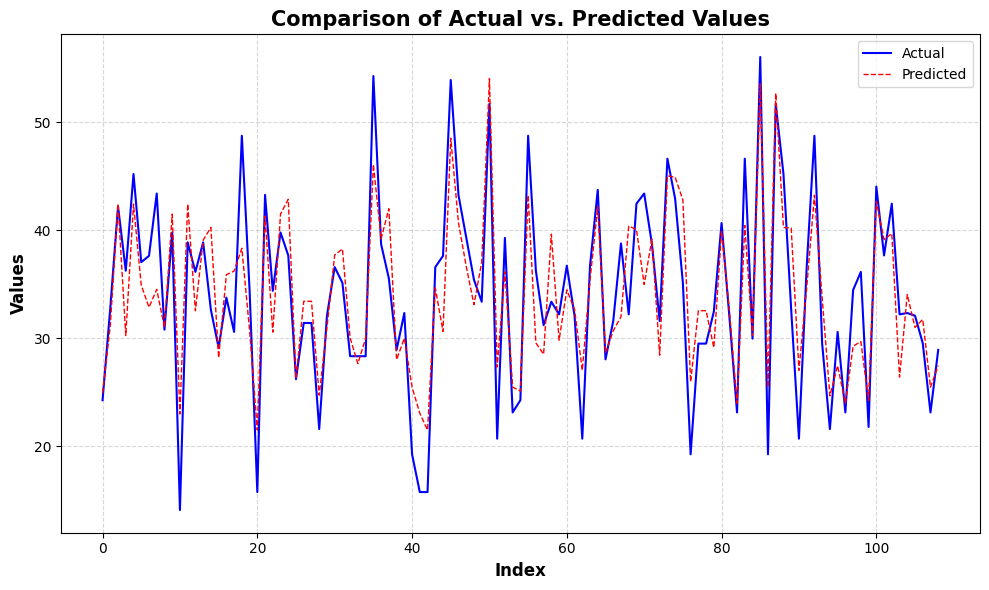

In [206]:
plt.figure(figsize = (10, 6))
plt.plot(y_test, color = 'blue', linewidth = 1.5, label = 'Actual')
plt.plot(y_pred, linestyle = '--', color = 'red', linewidth = 1, label = 'Predicted')
plt.xlabel('Index', fontsize = 12, fontweight = 'bold', color = 'black')
plt.ylabel('Values', fontsize = 12, fontweight = 'bold', color = 'black')
plt.title('Comparison of Actual vs. Predicted Values', fontsize = 15, fontweight = 'bold', color = 'black')
plt.xticks(fontsize = 10, color = 'black')
plt.yticks(fontsize = 10, color = 'black')
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.legend()

plt.tight_layout()
plt.show()

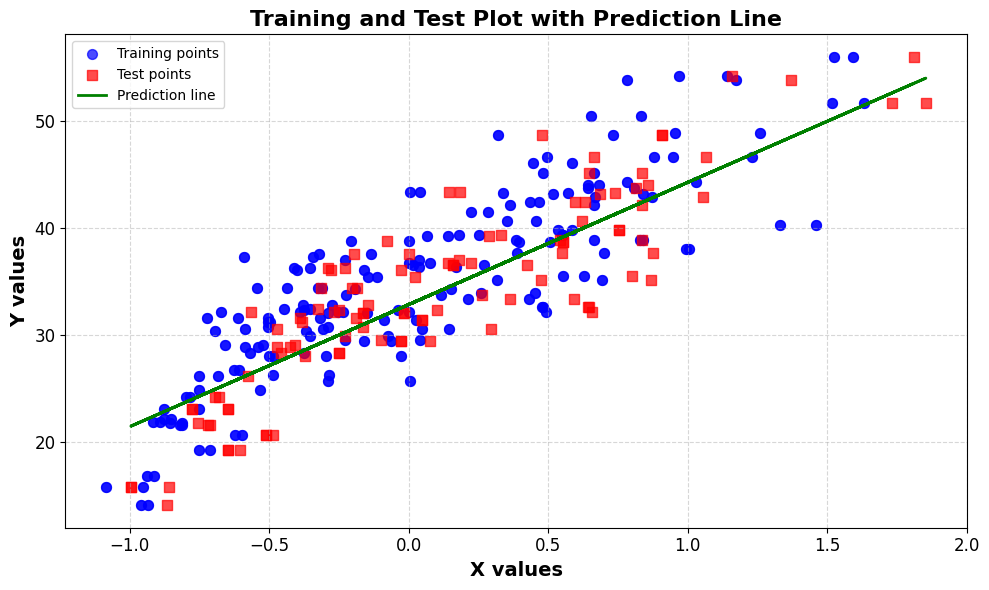

In [207]:
plt.figure(figsize=(10, 6))
plt.title('Training and Test Plot with Prediction Line', fontsize = 16, fontweight = 'bold', color = 'black')
plt.scatter(x_train, y_train, label = 'Training points', color = 'blue', marker = 'o', s = 50, alpha = 0.7)
plt.scatter(x_test, y_test, label = 'Test points', color = 'red', marker = 's', s = 50, alpha = 0.7)
plt.plot(x_test, y_pred, label = 'Prediction line', color = 'green', linewidth = 2)
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.xlabel('X values', fontsize = 14, fontweight = 'bold', color = 'black')
plt.ylabel('Y values', fontsize = 14, fontweight = 'bold', color = 'black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

In [208]:
#linear regression equation 
intercept = model.intercept_
slope = model.coef_
print('Regression line equation:')
print

Regression line equation:


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [209]:
intercept


array([17.01942252])

In [210]:
slope

array([[14.910728]])

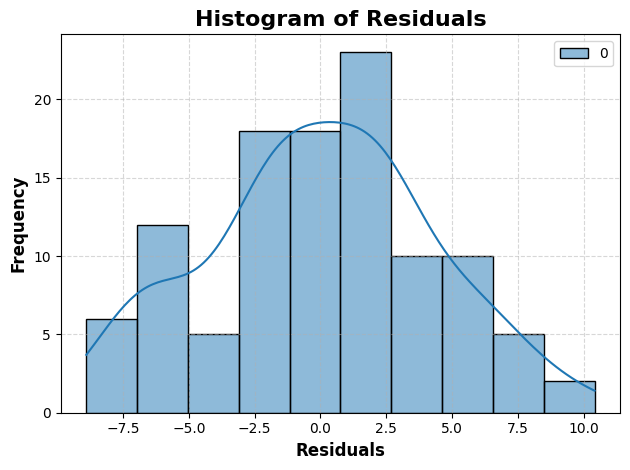

In [237]:
residuals = y_test - y_pred
sns.histplot(residuals, kde = True, color = 'skyblue')
plt.title('Histogram of Residuals', fontsize = 16, fontweight = 'bold', color='black')
plt.xlabel('Residuals', fontsize = 12, fontweight = 'bold', color = 'black')
plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold', color = 'black')
plt.xticks(fontsize = 10, color = 'black')
plt.yticks(fontsize = 10, color = 'black')
plt.grid(True, linestyle = '--', alpha = 0.5)

plt.tight_layout()
plt.show()

Now let's make the same arguments for the negative correlation between NO2 and O3. 

In [213]:
new_x = pollution_phoenix['NO2 Mean'].to_numpy().reshape(-1, 1)
print(len(new_x))
print(new_x)

360
[[21.916667]
 [21.916667]
 [21.916667]
 [21.916667]
 [24.26087 ]
 [24.26087 ]
 [24.26087 ]
 [24.26087 ]
 [16.791667]
 [16.791667]
 [16.791667]
 [16.791667]
 [21.583333]
 [21.583333]
 [21.583333]
 [21.583333]
 [21.782609]
 [21.782609]
 [21.782609]
 [21.782609]
 [19.25    ]
 [19.25    ]
 [19.25    ]
 [19.25    ]
 [14.083333]
 [14.083333]
 [14.083333]
 [14.083333]
 [22.125   ]
 [22.125   ]
 [22.125   ]
 [22.125   ]
 [24.913043]
 [24.913043]
 [24.913043]
 [24.913043]
 [30.791667]
 [30.791667]
 [30.791667]
 [30.791667]
 [37.333333]
 [37.333333]
 [37.333333]
 [37.333333]
 [34.388889]
 [34.388889]
 [34.388889]
 [34.388889]
 [32.458333]
 [32.458333]
 [32.458333]
 [32.458333]
 [28.333333]
 [28.333333]
 [28.333333]
 [28.333333]
 [36.714286]
 [36.714286]
 [36.714286]
 [36.714286]
 [43.4     ]
 [43.4     ]
 [43.4     ]
 [43.4     ]
 [48.75    ]
 [48.75    ]
 [48.75    ]
 [48.75    ]
 [39.333333]
 [39.333333]
 [39.333333]
 [39.333333]
 [35.416667]
 [35.416667]
 [35.416667]
 [35.416667]
 [31.409

In [214]:
new_y = pollution_phoenix['O3 Mean'].to_numpy().reshape(-1, 1)
print(len(new_y))
print(new_y)

360
[[0.022083]
 [0.022083]
 [0.022083]
 [0.022083]
 [0.025125]
 [0.025125]
 [0.025125]
 [0.025125]
 [0.018958]
 [0.018958]
 [0.018958]
 [0.018958]
 [0.015917]
 [0.015917]
 [0.015917]
 [0.015917]
 [0.018417]
 [0.018417]
 [0.018417]
 [0.018417]
 [0.021   ]
 [0.021   ]
 [0.021   ]
 [0.021   ]
 [0.028125]
 [0.028125]
 [0.028125]
 [0.028125]
 [0.019042]
 [0.019042]
 [0.019042]
 [0.019042]
 [0.012208]
 [0.012208]
 [0.012208]
 [0.012208]
 [0.017792]
 [0.017792]
 [0.017792]
 [0.017792]
 [0.016   ]
 [0.016   ]
 [0.016   ]
 [0.016   ]
 [0.014667]
 [0.014667]
 [0.014667]
 [0.014667]
 [0.014625]
 [0.014625]
 [0.014625]
 [0.014625]
 [0.017708]
 [0.017708]
 [0.017708]
 [0.017708]
 [0.011542]
 [0.011542]
 [0.011542]
 [0.011542]
 [0.016417]
 [0.016417]
 [0.016417]
 [0.016417]
 [0.013   ]
 [0.013   ]
 [0.013   ]
 [0.013   ]
 [0.02    ]
 [0.02    ]
 [0.02    ]
 [0.02    ]
 [0.018   ]
 [0.018   ]
 [0.018   ]
 [0.018   ]
 [0.00875 ]
 [0.00875 ]
 [0.00875 ]
 [0.00875 ]
 [0.012375]
 [0.012375]
 [0.012375]


In [215]:
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, train_size = 0.7, random_state = 0)

In [216]:
model = LinearRegression()
new_x_train = pollution_phoenix['NO2 Mean'].to_numpy().reshape(-1, 1)
new_y_train = pollution_phoenix['O3 Mean'].to_numpy().reshape(-1, 1)
print(new_x_train.shape, new_y_train.shape)
model.fit(new_x_train, new_y_train)

(360, 1) (360, 1)


LinearRegression()

In [217]:
score = model.score(new_x_test, new_y_test)
print("Coefficient of determination (R-squared):", score)

Coefficient of determination (R-squared): 0.38290081237162465


In [218]:
new_y_pred = model.predict(new_x_test)
print(len(new_y_pred))
new_y_pred

109


array([[0.01582022],
       [0.01219871],
       [0.00822473],
       [0.01074634],
       [0.00695512],
       [0.0104097 ],
       [0.01016443],
       [0.00772041],
       [0.01305634],
       [0.00924748],
       [0.02012741],
       [0.00963542],
       [0.01079168],
       [0.00963542],
       [0.01228046],
       [0.01376168],
       [0.01179932],
       [0.01314451],
       [0.00545626],
       [0.01150458],
       [0.01942207],
       [0.00777428],
       [0.01153397],
       [0.00924748],
       [0.0101468 ],
       [0.01499604],
       [0.01279504],
       [0.01279504],
       [0.01695337],
       [0.0125097 ],
       [0.01060527],
       [0.01122245],
       [0.01409672],
       [0.01409672],
       [0.01409672],
       [0.00311687],
       [0.00970596],
       [0.01104611],
       [0.01384985],
       [0.0124039 ],
       [0.01794085],
       [0.01942207],
       [0.01942207],
       [0.01060527],
       [0.01016443],
       [0.00327123],
       [0.00778389],
       [0.009

In [219]:
slope = model.coef_
slope

array([[-0.00042321]])

In [220]:
intercept = model.intercept_
intercept 

array([0.02608757])

In [221]:
r2_score(new_y_test, new_y_pred)

0.38290081237162465

In [222]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE):', mean_squared_error(new_y_test, new_y_pred))
print('Coefficient of determiantion (R^2):', r2_score(new_y_test, new_y_pred))

Coefficients: [[-0.00042321]]
Intercept: [0.02608757]
Mean squared error (MSE): 1.73508621668627e-05
Coefficient of determiantion (R^2): 0.38290081237162465


In [223]:
mse = mean_squared_error(new_y_test, new_y_pred)
target_variance = np.var(new_y_test)
mse_to_variance_ratio = mse / target_variance
print("MSE to Variance Ratio:", mse_to_variance_ratio)

MSE to Variance Ratio: 0.6170991876283753


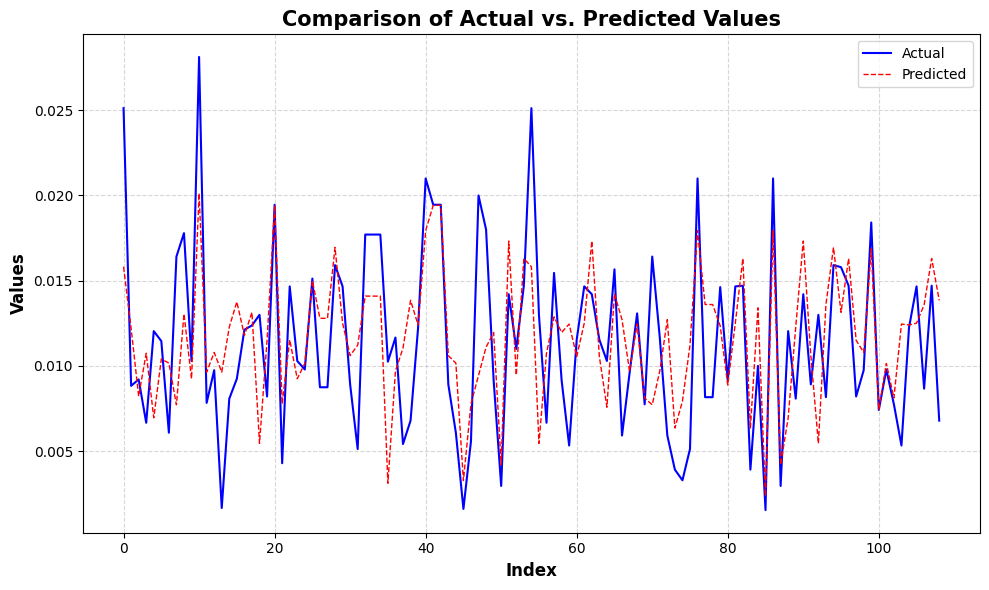

In [238]:
plt.figure(figsize = (10, 6))
plt.plot(new_y_test, color = 'blue', linewidth = 1.5, label = 'Actual')
plt.plot(new_y_pred, linestyle = '--', color = 'red', linewidth = 1, label = 'Predicted')
plt.xlabel('Index', fontsize = 12, fontweight = 'bold', color = 'black')
plt.ylabel('Values', fontsize = 12, fontweight = 'bold', color = 'black')
plt.title('Comparison of Actual vs. Predicted Values', fontsize = 15, fontweight = 'bold', color = 'black')
plt.xticks(fontsize = 10, color = 'black')
plt.yticks(fontsize = 10, color = 'black')
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.legend()

plt.tight_layout()
plt.show()

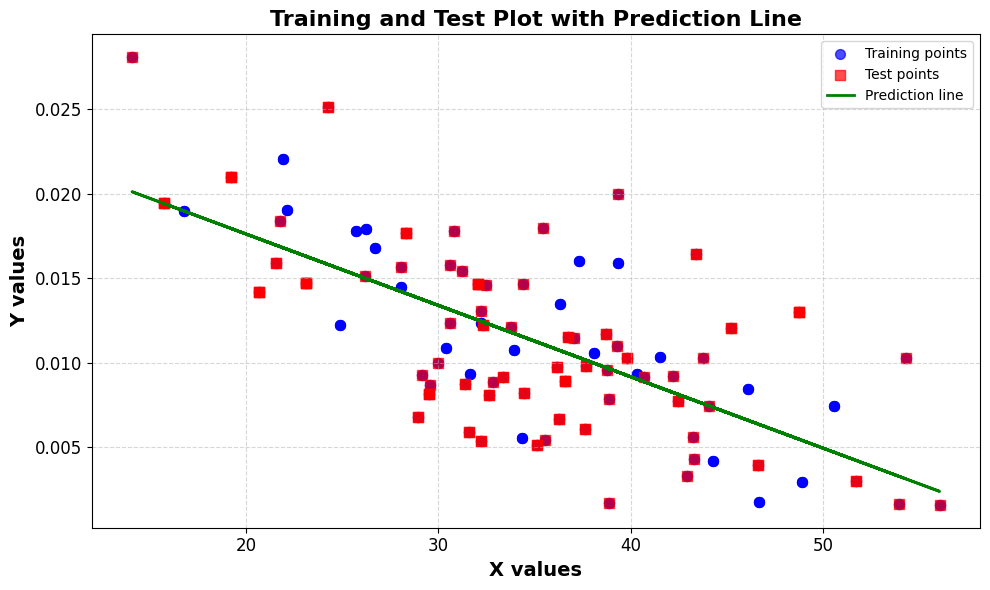

In [239]:
plt.figure(figsize=(10, 6))
plt.title('Training and Test Plot with Prediction Line', fontsize = 16, fontweight = 'bold', color = 'black')
plt.scatter(new_x_train, new_y_train, label = 'Training points', color = 'blue', marker = 'o', s = 50, alpha = 0.7)
plt.scatter(new_x_test, new_y_test, label = 'Test points', color = 'red', marker = 's', s = 50, alpha = 0.7)
plt.plot(new_x_test, new_y_pred, label = 'Prediction line', color = 'green', linewidth = 2)
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.xlabel('X values', fontsize = 14, fontweight = 'bold', color = 'black')
plt.ylabel('Y values', fontsize = 14, fontweight = 'bold', color = 'black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

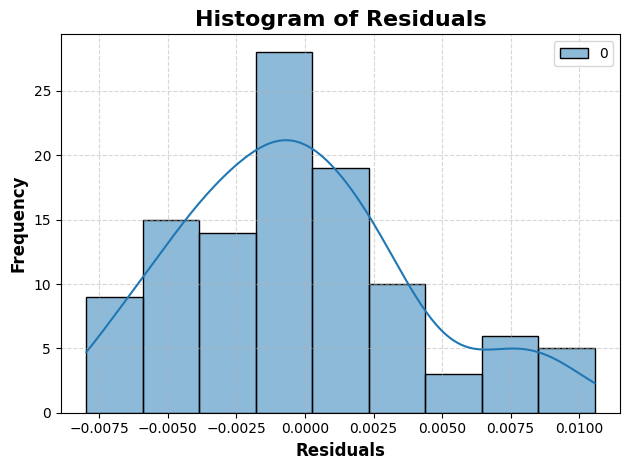

In [240]:
residuals = new_y_test - new_y_pred
sns.histplot(residuals, kde = True, color = 'skyblue')
plt.title('Histogram of Residuals', fontsize = 16, fontweight = 'bold', color='black')
plt.xlabel('Residuals', fontsize = 12, fontweight = 'bold', color = 'black')
plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold', color = 'black')
plt.xticks(fontsize = 10, color = 'black')
plt.yticks(fontsize = 10, color = 'black')
plt.grid(True, linestyle = '--', alpha = 0.5)

plt.tight_layout()
plt.show()

CLUSTERING 

In [226]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [227]:
pollution_df['Date Local'] = pd.to_datetime(pollution_df['Date Local'])
start_date = pd.to_datetime('2001-01-01')
end_date = pd.to_datetime('2001-12-31')
pollution_df = pollution_df[(pollution_df['Date Local'] >= start_date) & (pollution_df['Date Local'] <= end_date)]

In [228]:
pollution_df.groupby('City').first()

,State,County,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
City,,,,,,,,,,,,,,,,,,,
Altoona,Pennsylvania,Blair,2001-03-31,8.291667,18.0,23,17,0.012500,0.013,23,11,12.750000,37.0,21,52.0,0.233333,0.4,23,3.0
Arden-Arcade,California,Sacramento,2001-01-01,27.727273,43.0,17,41,0.004542,0.014,9,12,4.363636,11.0,0,16.0,2.277273,4.3,0,42.0
Ashland,Kentucky,Boyd,2001-02-28,12.333333,29.0,21,27,0.005000,0.005,22,4,1.636364,5.0,10,7.0,0.059091,0.2,22,1.0
Bakersfield,California,Kern,2001-01-01,36.521739,66.0,17,64,0.016625,0.041,10,35,1.869565,5.0,9,7.0,1.556522,2.9,8,28.0
Baton Rouge,Louisiana,East Baton Rouge,2001-01-01,3.000000,13.0,0,12,0.024875,0.028,11,24,2.958333,7.0,0,10.0,0.275000,0.4,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Welby,Colorado,Adams,2001-01-01,29.130435,41.0,22,39,0.003167,0.007,10,6,0.130435,1.0,0,1.0,0.850000,2.2,23,13.0
West Los Angeles,California,Los Angeles,2001-06-27,15.636364,46.0,8,43,0.012833,0.024,10,20,19.416667,37.0,7,52.0,0.045455,1.0,5,2.0
Winston-Salem,North Carolina,Forsyth,2001-05-10,16.541667,30.0,0,28,0.041833,0.070,11,84,2.416667,16.0,17,23.0,0.490000,0.6,22,6.0


In [229]:
pollution_df = pollution_df.loc[:,['State','City', 'NO2 Mean', 'SO2 Mean', 'CO Mean', 'O3 Mean']]
pollution_df

,State,City,NO2 Mean,SO2 Mean,CO Mean,O3 Mean
91646,Arizona,Phoenix,36.250000,3.583333,1.925000,0.006875
91647,Arizona,Phoenix,36.250000,3.583333,1.536842,0.006875
91648,Arizona,Phoenix,36.250000,3.550000,1.925000,0.006875
91649,Arizona,Phoenix,36.250000,3.550000,1.536842,0.006875
91650,Arizona,Phoenix,36.173913,2.695652,1.413043,0.007458
...,...,...,...,...,...,...
181112,Texas,Houston,9.454545,2.637500,0.250000,0.021583
181113,Texas,Houston,6.166667,0.000000,0.166667,0.020105
181114,Texas,Houston,6.166667,0.000000,0.166667,0.020105
181115,Texas,Houston,6.166667,0.000000,0.166667,0.020105


In [230]:
pollution_df = pollution_df.groupby(['State', 'City']).mean()
pollution_df

NO2 Mean  SO2 Mean   CO Mean   O3 Mean
State        City                                                 
Arizona      Phoenix       28.836456  2.473995  0.857994  0.019995
             Scottsdale    24.036047  1.721501  0.752954  0.016099
             Tucson        15.595164  0.788653  0.369223  0.026651
California   Arden-Arcade  14.708504  2.566324  0.492627  0.025620
             Bakersfield   28.347502  1.676078  0.794801  0.018737
...                              ...       ...       ...       ...
Pennsylvania Scranton      13.848996  3.199889  0.492437  0.029116
             York          17.988532  5.206229  0.265746  0.030968
Texas        Dallas        18.854468  0.993340  0.385097  0.022395
             El Paso       14.438937  0.673713  0.430057  0.031318
             Houston       16.872026  4.366643  0.302347  0.019892

[82 rows x 4 columns]

In [231]:
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(pollution_df.to_numpy()[:,2:])

In [232]:
kmeans.labels_

array([0, 0, 9, 7, 0, 9, 4, 0, 1, 0, 3, 3, 9, 5, 9, 0, 5, 0, 4, 9, 6, 7,
       0, 0, 6, 9, 7, 1, 2, 6, 6, 4, 6, 7, 0, 7, 9, 3, 1, 1, 1, 8, 9, 8,
       8, 0, 5, 9, 7, 3, 4, 2, 7, 2, 8, 3, 6, 1, 3, 3, 7, 8, 8, 8, 1, 5,
       5, 8, 1, 1, 7, 5, 5, 5, 3, 9, 7, 7, 5, 9, 2, 5], dtype=int32)

In [233]:
for i, label in enumerate(kmeans.labels_):
    if label == 5:
        print(pollution_df.iloc[i])

NO2 Mean    4.566797
SO2 Mean    1.054504
CO Mean     0.299827
O3 Mean     0.024735
Name: (California, Davenport), dtype: float64
NO2 Mean    5.933990
SO2 Mean    0.359251
CO Mean     0.324627
O3 Mean     0.027572
Name: (California, Lompoc), dtype: float64
NO2 Mean    24.048434
SO2 Mean     5.902048
CO Mean      0.297726
O3 Mean      0.019194
Name: (Massachusetts, Boston), dtype: float64
NO2 Mean    15.887924
SO2 Mean     6.519608
CO Mean      0.255365
O3 Mean      0.024353
Name: (Pennsylvania, Beaver Falls), dtype: float64
NO2 Mean    16.109195
SO2 Mean     3.246140
CO Mean      0.293485
O3 Mean      0.029571
Name: (Pennsylvania, Bristol), dtype: float64
NO2 Mean    11.196062
SO2 Mean     1.832203
CO Mean      0.298439
O3 Mean      0.031569
Name: (Pennsylvania, Lancaster), dtype: float64
NO2 Mean    14.909096
SO2 Mean     9.290409
CO Mean      0.312559
O3 Mean      0.023769
Name: (Pennsylvania, New Castle), dtype: float64
NO2 Mean    14.446027
SO2 Mean     3.118845
CO Mean      0.2430

In [234]:
for i, label in enumerate(kmeans.labels_):
    if label == 1:
        print(pollution_df.iloc[i])

NO2 Mean    3.512089
SO2 Mean    0.524498
CO Mean     0.187876
O3 Mean     0.039349
Name: (California, Capitan), dtype: float64
NO2 Mean    0.429801
SO2 Mean    0.095646
CO Mean     0.175793
O3 Mean     0.034839
Name: (California, Vandenberg Air Force Base), dtype: float64
NO2 Mean    3.932792
SO2 Mean    0.420516
CO Mean     0.134464
O3 Mean     0.031684
Name: (Kansas, Not in a city), dtype: float64
NO2 Mean    14.196713
SO2 Mean     4.899740
CO Mean      0.103679
O3 Mean      0.029495
Name: (Kentucky, Ashland), dtype: float64
NO2 Mean    14.988356
SO2 Mean     4.926583
CO Mean      0.133101
O3 Mean      0.027368
Name: (Kentucky, Henderson), dtype: float64
NO2 Mean    16.927223
SO2 Mean     6.019886
CO Mean      0.209721
O3 Mean      0.027767
Name: (New York, Holtsville), dtype: float64
NO2 Mean    11.518088
SO2 Mean     5.984228
CO Mean      0.104233
O3 Mean      0.029323
Name: (Pennsylvania, Altoona), dtype: float64
NO2 Mean    14.188633
SO2 Mean     1.835485
CO Mean      0.218395
O

In [235]:
for i, label in enumerate(kmeans.labels_):
    if label == 7:
        print(pollution_df.iloc[i])

NO2 Mean    14.708504
SO2 Mean     2.566324
CO Mean      0.492627
O3 Mean      0.025620
Name: (California, Arden-Arcade), dtype: float64
NO2 Mean    13.711942
SO2 Mean     2.654110
CO Mean      0.524779
O3 Mean      0.025196
Name: (California, Pittsburg), dtype: float64
NO2 Mean    12.922236
SO2 Mean     0.943306
CO Mean      0.529055
O3 Mean      0.021029
Name: (California, Vallejo), dtype: float64
NO2 Mean    22.657104
SO2 Mean     3.541867
CO Mean      0.499435
O3 Mean      0.020729
Name: (Illinois, Calumet City (PU RR name Calumet Park (sta.))), dtype: float64
NO2 Mean    19.223074
SO2 Mean     7.381571
CO Mean      0.513304
O3 Mean      0.021472
Name: (Illinois, East Saint Louis), dtype: float64
NO2 Mean    15.569396
SO2 Mean     3.324678
CO Mean      0.479102
O3 Mean      0.029799
Name: (Missouri, Breckenridge Hills), dtype: float64
NO2 Mean    18.867123
SO2 Mean     5.283306
CO Mean      0.506185
O3 Mean      0.029400
Name: (Missouri, St. Louis), dtype: float64
NO2 Mean    12.22

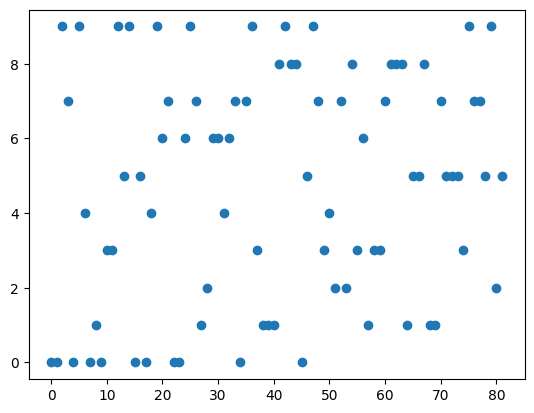

In [236]:
plt.scatter(range(len(kmeans.labels_)), kmeans.labels_)